# IEEE Big Data Challenge

## Initial steps

Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training = pd.read_csv('./cybersecurity_training.csv', delimiter="|", header=[0])

In [3]:
training.head()

,alert_ids,client_code,notified,categoryname,ip,ipcategory_name,ipcategory_scope,parent_category,grandparent_category,overallseverity,...,thrcnt_week,thrcnt_day,p6,p9,p5m,p5w,p5d,p8m,p8w,p8d
0,Nhq,DPM,0,Attack,YT.LB.32.21,INTERNET,Internet,7,A,3,...,4160,675,1,0,2,1,1,1,1,1
1,XZt,FIN,0,Exploit,192.SL.UK.94,PRIV-192,Private network,1,A,5,...,9,2,4,12,3,2,2,2,1,1
2,bBz,CHP,0,Attack,YT.LB.38.21,INTERNET,Internet,7,A,4,...,3788,628,1,0,2,2,1,2,2,1
3,ZNr,HPS,0,Attack,JX.NY.13.20,INTERNET,Internet,7,A,4,...,565,96,0,0,2,2,2,2,2,2
4,poV,OSC,0,Attack,YT.LB.32.21,INTERNET,Internet,7,A,4,...,2790,632,1,0,1,1,1,1,1,1


In [4]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39427 entries, 0 to 39426
Data columns (total 63 columns):
alert_ids                   39427 non-null object
client_code                 39427 non-null object
notified                    39427 non-null int64
categoryname                39427 non-null object
ip                          39427 non-null object
ipcategory_name             39427 non-null object
ipcategory_scope            39427 non-null object
parent_category             39427 non-null int64
grandparent_category        39427 non-null object
overallseverity             39427 non-null int64
timestamp_dist              39427 non-null int64
start_hour                  39427 non-null int64
start_minute                39427 non-null int64
start_second                39427 non-null int64
weekday                     39427 non-null object
correlatedcount             39427 non-null int64
n1                          7132 non-null float64
n2                          7132 non-null float64

Variable Type Changes

In [5]:
training['notified']=training['notified'].astype('category')
training['score']=training['score'].astype('category')
training['notified'].dtypes


CategoricalDtype(categories=[0, 1], ordered=False)

## Explanatory analysis of the variables

### Define explanatory analyses

In [6]:
def categorical_variable_exploration( dataset,column, predicted_column, normalize, stacked):
    # Params: 
    #    dataset : Dataframe
    #    column : name of the categorical column
    #    predicted_column: name of the predicted variable
    #    normalize: True/False whether to normalize bar plot
    #    stacked: True/False whether to stack bar plot 
    
    print("Describe")
    print(dataset[column].describe())
    print("\n")
    print("Value counts")
    print(dataset[column].value_counts())
    print("\n")
    print("Value caunts by ", predicted_column)
    print(training.groupby(column)[predicted_column].value_counts(normalize=normalize).unstack())
    print("\n")
    fig = plt.figure()
    fig.set_size_inches(12,8)
    dataset.groupby(column)[predicted_column].value_counts(normalize=normalize).unstack().plot(kind='bar', stacked=stacked, figsize=(12,8))
    plt.show()
    
def joint_variable_exploration(dataset, column, predicted_column, bin_num, quantile, log_scale, no_notify, notify):
    
    print("Describe")
    print(dataset[column].describe())
    print("\n")
    
    # Basic Histogram
    print("Basic Histogram")
    sns.set(style="darkgrid", palette="muted", color_codes=True)
    fig = plt.figure()
    fig.set_size_inches(12,8)
    fig = sns.distplot(dataset[column],bins=bin_num, kde=False)
    if log_scale:
        fig.set_yscale('log')
    plt.show()
    
    print("Histogram by ",predicted_column)
    
    # Prepare variables
    notified =  dataset.loc[dataset.notified == 1, column]
    not_notified = dataset.loc[dataset.notified== 0, column]
    print("not_notified", not_notified.describe())
    print("\n") 
    print("notified: ", notified.describe())
    print("\n")
   
   
    fig = plt.figure(figsize=(16,8))
    if notify:
        fig = sns.distplot(notified[notified <= notified.quantile(quantile)], color="dodgerblue", label="notified", bins = bin_num, kde=False)
    if no_notify:
        fig = sns.distplot(not_notified[not_notified <= not_notified.quantile(quantile)], color="orange", label="not_notified", bins = bin_num, kde=False)
    if log_scale:
        fig.set_yscale('log')
    plt.legend();
    plt.show()

### alert_ids

- an identifier of the alert, values from this column should be used to match the corresponding records from the event_logs files 
- unique, no relation to the "notified"

### client_code

- encrypted identifiers of clients for which alerts were generated

In [7]:
training['client_code'].value_counts()

REQ    853
OAO    602
VME    486
EOL    443
CPJ    436
TZS    423
ZZE    414
GBU    414
RVK    396
ESS    392
MBO    391
WNU    381
MCR    379
RBC    376
ZRU    367
TGC    367
QXG    365
QOP    362
JIT    359
VXK    350
OUQ    350
DQN    345
WBD    344
MGS    337
IJY    333
NAW    324
LTN    322
QPI    322
GEP    307
LSB    305
      ... 
DXE     16
NMQ     16
ZPO     16
GXP     14
WOR     14
OBZ     14
ADX     13
RCX     13
KKL     12
NUR     12
RWN     12
JHF     11
TOU     11
PFU     10
GWP     10
AVD      9
VJJ      8
ZTR      7
BMT      7
BJG      5
MZU      5
BCX      4
TIY      4
TTW      3
EBH      2
WDO      2
LSH      2
JGW      1
XGC      1
CKM      1
Name: client_code, Length: 276, dtype: int64

### notified

- a binary column indicating whether a client was notified about the alert
- target variable

In [8]:
training['notified'].value_counts()

0    37151
1     2276
Name: notified, dtype: int64

### categoryname

- a category name of the alert that corresponds to its severity
- categorical value

Describe
count      39427
unique        11
top       Attack
freq       23500
Name: categoryname, dtype: object


Value counts
Attack                         23500
Exploit                         8734
Control and Maintain            2729
Reconnaissance                  2118
Suspicious Reputation            812
Suspicious Network Activity      590
Attack Preparation               463
Compromise                       358
Malicious Activity               120
To Be Determined                   2
Suspicious Account Activity        1
Name: categoryname, dtype: int64


Value caunts by  notified
notified                            0         1
categoryname                                   
Attack                       0.970638  0.029362
Attack Preparation           0.989201  0.010799
Compromise                   0.927374  0.072626
Control and Maintain         0.803591  0.196409
Exploit                      0.912411  0.087589
Malicious Activity           0.783333  0.216667
Reconnaissance        

<Figure size 864x576 with 0 Axes>

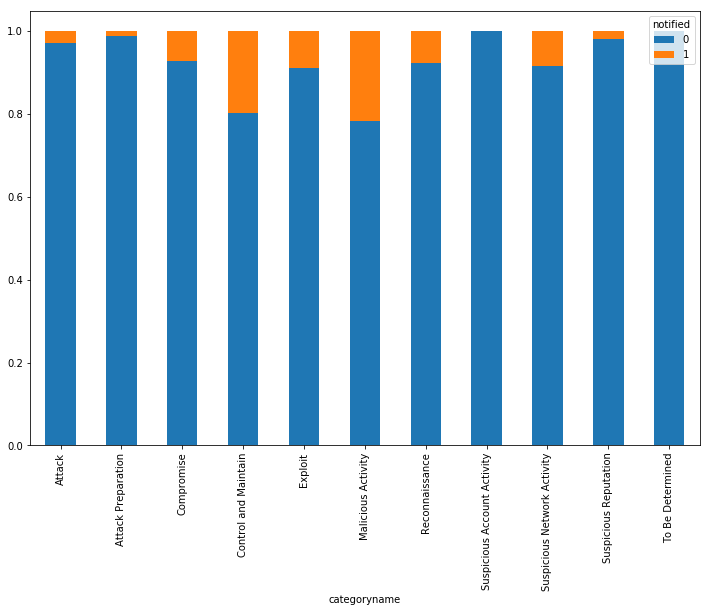

In [9]:
categorical_variable_exploration(dataset=training, column='categoryname', predicted_column='notified', normalize=True, stacked=True)

### ip

- an encrypted IP address corresponding to the alert
- TODO: do subnet variable

In [ ]:
training['ip'].value_counts()

In [11]:
training.groupby(['ip','notified'])['alert_ids'].count()

ip             notified
10.AA.AE.6     1            1
10.AA.CC.70    0            1
10.AA.EM.23    0            1
10.AA.EM.28    0            1
10.AA.FN.3     0            1
10.AA.FN.32    0            1
10.AA.FN.40    0            1
10.AA.FN.8     0            1
10.AA.GS.16    0            1
10.AA.GS.21    0            1
10.AA.IP.121   0            1
10.AA.IP.146   1            1
10.AA.IP.15    0            2
               1            1
10.AA.IU.23    0            1
10.AA.IU.38    0            1
10.AA.KJ.102   0            2
               1            1
10.AA.KJ.26    0            1
               1            1
10.AA.KJ.43    0            1
10.AA.KJ.81    0            1
               1            3
10.AA.RJ.15    0            1
10.AA.RJ.39    0            1
10.AA.VL.31    0            1
10.AA.VL.68    0            1
10.AA.XK.49    0            1
10.AA.XK.7     0            1
10.AG.GO.105   0            1
                           ..
ZR.ZS.54.107   0            1
ZR.ZS.55.193   0

### ipcategory_name

- a category of the corresponding IP, created based on https://en.wikipedia.org/wiki/Reserved_IP_addresses


Describe
count        39427
unique           9
top       INTERNET
freq         26938
Name: ipcategory_name, dtype: object


Value counts
INTERNET      26938
PRIV-10        8410
PRIV-192       2027
PRIV-172       1629
PRIV-CGN        411
LINK-LOCAL        5
LOOPBACK          4
BROADCAST         2
MULTICAST         1
Name: ipcategory_name, dtype: int64


Value caunts by  notified
notified                0         1
ipcategory_name                    
BROADCAST        1.000000       NaN
INTERNET         0.963397  0.036603
LINK-LOCAL       1.000000       NaN
LOOPBACK         1.000000       NaN
MULTICAST        1.000000       NaN
PRIV-10          0.886801  0.113199
PRIV-172         0.925107  0.074893
PRIV-192         0.894919  0.105081
PRIV-CGN         0.992701  0.007299




<Figure size 864x576 with 0 Axes>

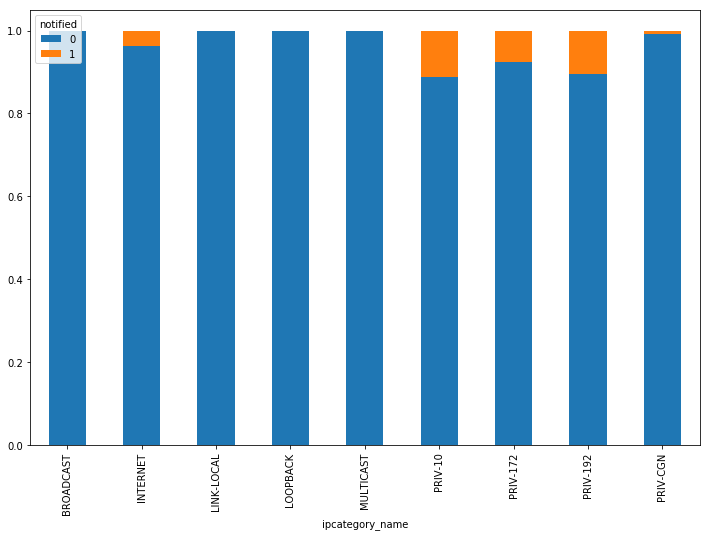

In [12]:
categorical_variable_exploration(dataset=training, column='ipcategory_name', predicted_column='notified', normalize=True, stacked=True)

### ipcategory_scope

- a domain of the corresponding IP category, created based on https://en.wikipedia.org/wiki/Reserved_IP_addresses

Describe
count        39427
unique           4
top       Internet
freq         26939
Name: ipcategory_scope, dtype: object


Value counts
Internet           26939
Private network    12477
Subnet                 7
Host                   4
Name: ipcategory_scope, dtype: int64


Value caunts by  notified
notified                 0         1
ipcategory_scope                    
Host              1.000000       NaN
Internet          0.963399  0.036601
Private network   0.896610  0.103390
Subnet            1.000000       NaN




<Figure size 864x576 with 0 Axes>

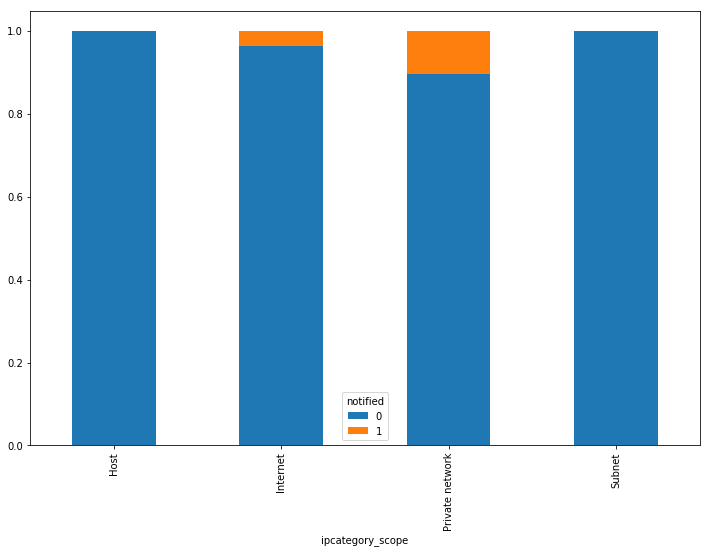

In [13]:
categorical_variable_exploration(dataset=training, column='ipcategory_scope', predicted_column='notified', normalize=True, stacked=True)

### parent_category

- a parent category of the IP category name

Describe
count    39427.000000
mean         5.121085
std          2.767197
min          1.000000
25%          1.000000
50%          7.000000
75%          7.000000
max          7.000000
Name: parent_category, dtype: float64


Value counts
7    26938
1    12066
3      416
4        6
5        1
Name: parent_category, dtype: int64


Value caunts by  notified
notified                0         1
parent_category                    
1                0.893337  0.106663
3                0.992788  0.007212
4                1.000000       NaN
5                1.000000       NaN
7                0.963397  0.036603




<Figure size 864x576 with 0 Axes>

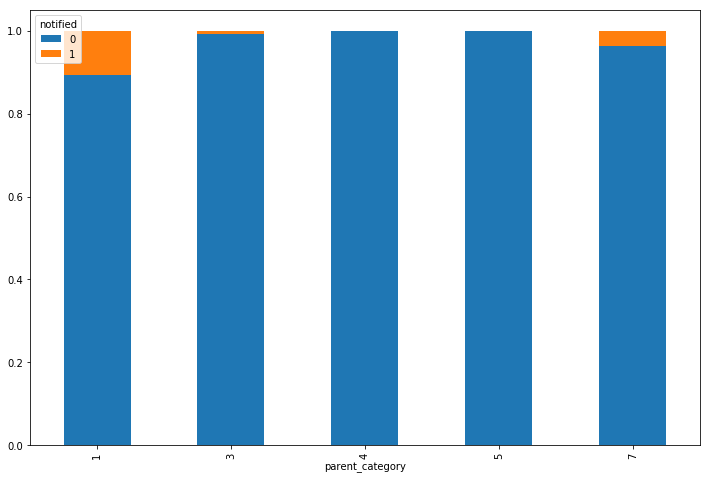

In [14]:
categorical_variable_exploration(dataset=training, column='parent_category', predicted_column='notified', normalize=True, stacked=True)

### grandparent_category

- a grandparent category of the IP category name
- no idea what is this about
- useless

Describe
count     39427
unique        2
top           A
freq      39420
Name: grandparent_category, dtype: object


Value counts
A    39420
B        7
Name: grandparent_category, dtype: int64


Value caunts by  notified
notified                     0         1
grandparent_category                    
A                     0.942263  0.057737
B                     1.000000       NaN




<Figure size 864x576 with 0 Axes>

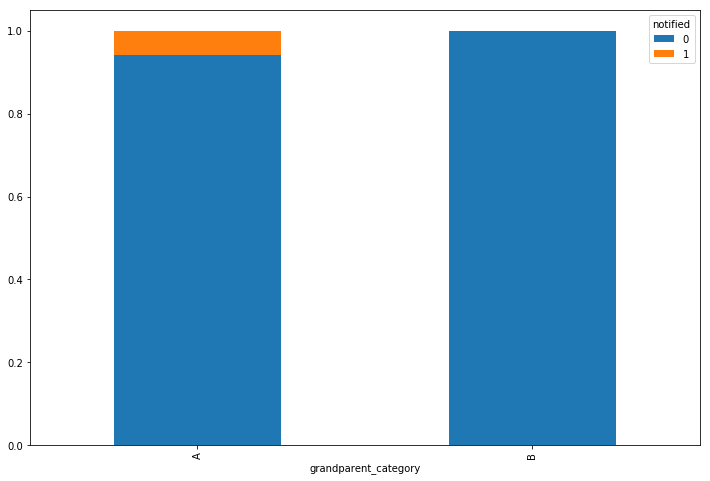

In [15]:
categorical_variable_exploration(dataset=training, column='grandparent_category', predicted_column='notified', normalize=True, stacked=True)

### overallseverity

- an estimation of the alert severity generated by the system rules


Describe
count    39427.000000
mean         4.285515
std          0.889196
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: overallseverity, dtype: float64


Value counts
5    21667
4     8476
3     8187
2     1068
1       29
Name: overallseverity, dtype: int64


Value caunts by  notified
notified                0         1
overallseverity                    
1                1.000000       NaN
2                0.981273  0.018727
3                0.962502  0.037498
4                0.923785  0.076215
5                0.939862  0.060138




<Figure size 864x576 with 0 Axes>

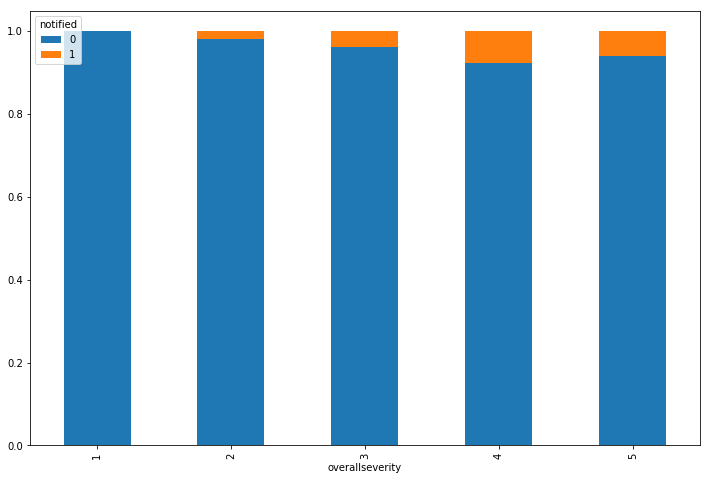

In [16]:
categorical_variable_exploration(dataset=training, column='overallseverity', predicted_column='notified', normalize=True, stacked=True)

### timestamp_dist

- a time period (in seconds) between the first and the last log event corresponding to the alert


Describe
count    3.942700e+04
mean     4.422788e+04
std      2.199384e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.983000e+03
75%      1.078650e+04
max      2.850128e+06
Name: timestamp_dist, dtype: float64


Basic Histogram


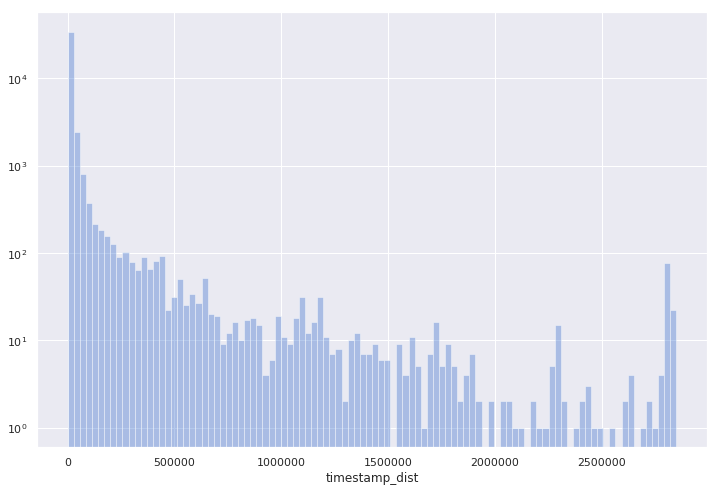

Histogram by  notified
not_notified count    3.715100e+04
mean     4.061585e+04
std      2.068907e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.926000e+03
75%      1.034900e+04
max      2.850128e+06
Name: timestamp_dist, dtype: float64


notified:  count    2.276000e+03
mean     1.031867e+05
std      3.683015e+05
min      0.000000e+00
25%      1.000000e+00
50%      3.113000e+03
75%      2.707175e+04
max      2.844484e+06
Name: timestamp_dist, dtype: float64




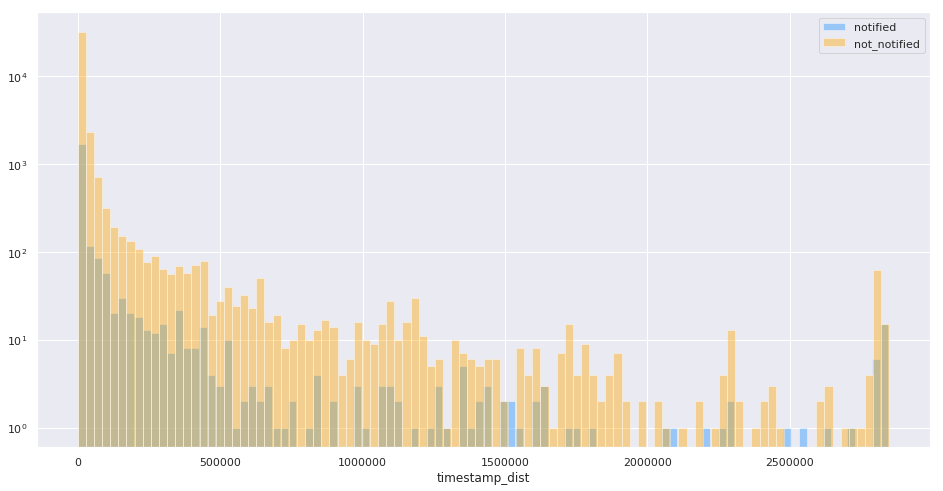

In [17]:
joint_variable_exploration(dataset=training, column='timestamp_dist', predicted_column='notified', bin_num=100, quantile=1, log_scale=True, no_notify=True, notify=True)

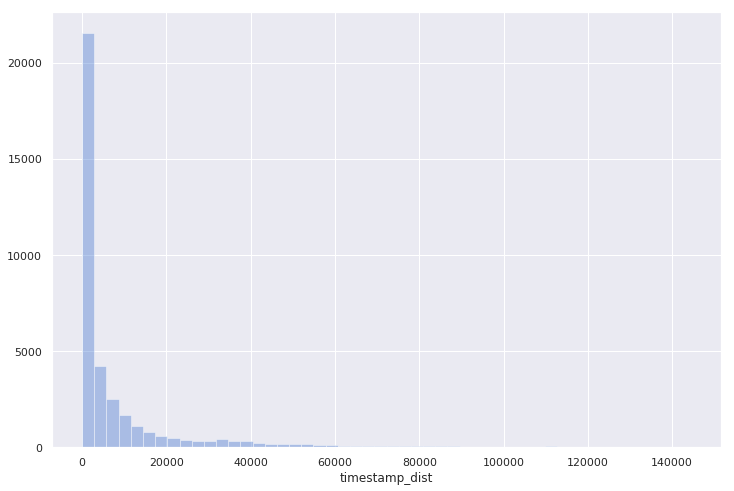

In [18]:
sns.set(style="darkgrid", palette="muted", color_codes=True)
fig = plt.figure()
fig.set_size_inches(12,8)
sns.distplot(training[training['timestamp_dist']< training['timestamp_dist'].quantile(0.95)]['timestamp_dist'],bins=50, kde=False)

In [19]:
notified =  training.loc[training.notified == 1, 'timestamp_dist']
not_notified = training.loc[training.notified== 0, 'timestamp_dist']


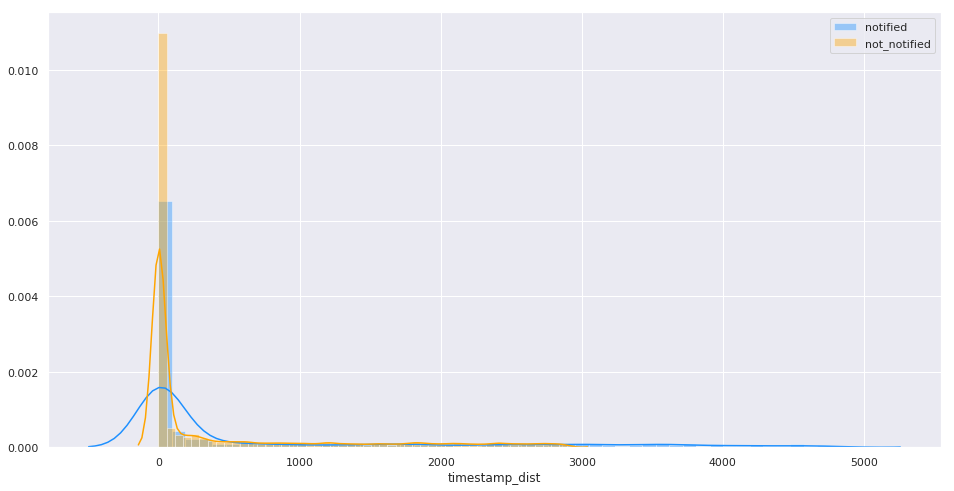

In [20]:
quantile = 0.55
bin_num = 50
fig = plt.figure(figsize=(16,8))
sns.distplot(notified[notified < notified.quantile(quantile)], color="dodgerblue", label="notified", bins = bin_num)
sns.distplot(not_notified[not_notified < not_notified.quantile(quantile)], color="orange", label="not_notified", bins = bin_num)
plt.legend();


### start_hour
- an hour of the first log event that is assumed to be the first of the events corresponding to the alert


Describe
count    39427.000000
mean        13.487306
std          6.993156
min          0.000000
25%          8.000000
50%         15.000000
75%         19.000000
max         23.000000
Name: start_hour, dtype: float64


Value counts
19    2602
21    2547
16    2459
17    2422
20    2373
15    2372
18    2363
22    2320
23    1911
14    1908
0     1905
13    1576
1     1340
12    1334
3     1260
2     1242
4     1118
11    1083
10    1069
9      956
7      845
5      832
8      824
6      766
Name: start_hour, dtype: int64


Value caunts by  notified
notified           0         1
start_hour                    
0           0.959580  0.040420
1           0.957463  0.042537
2           0.948470  0.051530
3           0.948413  0.051587
4           0.958855  0.041145
5           0.915865  0.084135
6           0.919060  0.080940
7           0.912426  0.087574
8           0.927184  0.072816
9           0.915272  0.084728
10          0.932647  0.067353
11          0.941828  0.058172
12        

<Figure size 864x576 with 0 Axes>

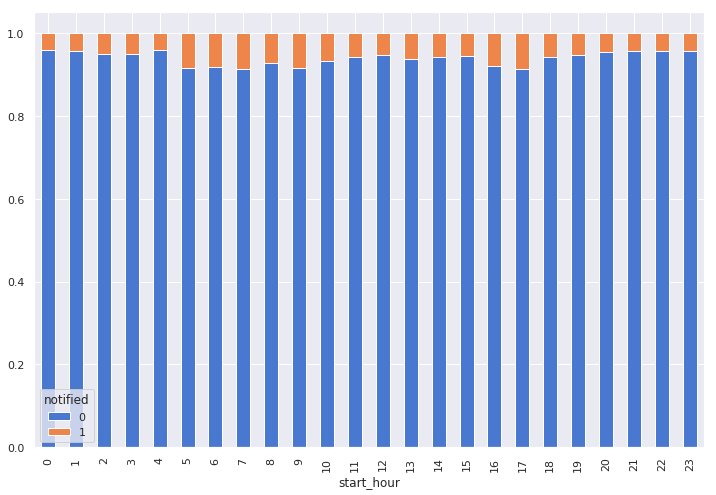

In [21]:
categorical_variable_exploration(dataset=training, column='start_hour', predicted_column='notified', normalize=True, stacked=True)

### start_minute
- a minute of the first log event that is assumed to be the first of the events corresponding to the alert

Describe
count    39427.000000
mean        28.927816
std         17.192223
min          0.000000
25%         14.000000
50%         29.000000
75%         44.000000
max         59.000000
Name: start_minute, dtype: float64


Value counts
12    1011
0      809
18     719
37     718
23     717
31     706
44     698
30     694
26     690
3      689
45     684
42     683
11     681
19     680
10     673
1      672
43     672
46     670
34     670
13     666
29     665
21     665
6      664
27     664
4      661
40     660
28     660
15     659
51     659
36     655
32     652
35     652
50     651
47     644
2      644
33     644
16     643
17     641
14     638
25     637
38     637
24     633
57     632
39     632
7      629
9      628
48     625
8      623
52     616
41     615
54     610
22     606
20     600
58     593
5      589
59     587
55     580
49     580
56     576
53     576
Name: start_minute, dtype: int64


Value caunts by  notified
notified             0         1
start_minut

<Figure size 864x576 with 0 Axes>

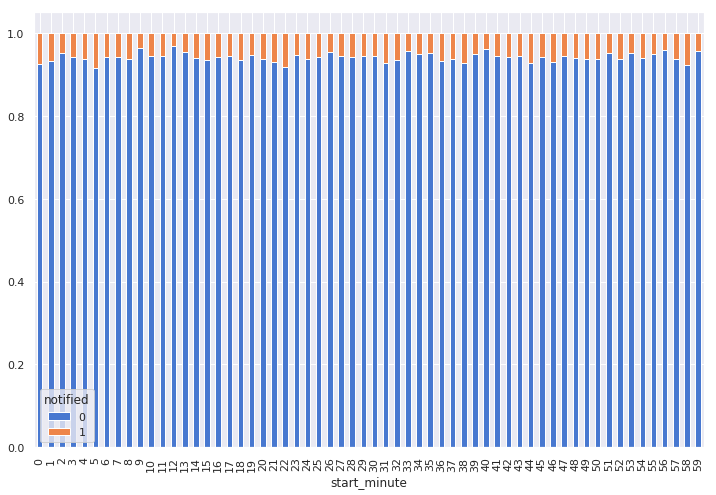

In [22]:
categorical_variable_exploration(dataset=training, column='start_minute', predicted_column='notified', normalize=True, stacked=True)

### start_second
- a second of the first log event that is assumed to be the first of the events corresponding to the alert

Describe
count    39427.000000
mean        29.270500
std         17.300568
min          0.000000
25%         14.000000
50%         29.000000
75%         44.000000
max         59.000000
Name: start_second, dtype: float64


Value counts
29    720
20    717
7     716
42    714
14    711
19    711
22    709
33    708
1     693
30    689
11    689
5     686
26    686
21    683
51    679
3     678
18    678
4     677
56    677
44    675
13    674
28    673
23    672
46    671
25    670
2     670
45    665
6     660
34    659
0     659
59    657
50    656
41    654
40    653
43    651
16    650
38    649
52    648
39    645
49    644
12    644
17    643
54    643
47    635
36    633
57    629
10    627
9     624
48    621
37    621
58    620
55    619
24    619
27    609
35    605
53    602
15    600
8     590
31    590
32    577
Name: start_second, dtype: int64


Value caunts by  notified
notified             0         1
start_second                    
0             0.928680  0.071320
1    

<Figure size 864x576 with 0 Axes>

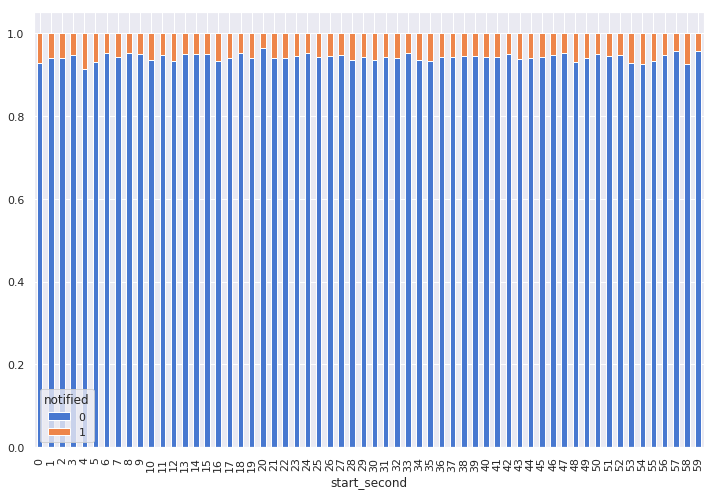

In [23]:
categorical_variable_exploration(dataset=training, column='start_second', predicted_column='notified', normalize=True, stacked=True)

### weekday
- a day of week of the first log event that is assumed to be the first of the events corresponding to the alert

Describe
count     39427
unique        7
top         Thu
freq       7506
Name: weekday, dtype: object


Value counts
Thu    7506
Tue    6566
Wed    6472
Mon    6225
Fri    5953
Sat    3465
Sun    3240
Name: weekday, dtype: int64


Value caunts by  notified
notified         0         1
weekday                     
Fri       0.947421  0.052579
Mon       0.943775  0.056225
Sat       0.946609  0.053391
Sun       0.936728  0.063272
Thu       0.940847  0.059153
Tue       0.943497  0.056503
Wed       0.936959  0.063041




<Figure size 864x576 with 0 Axes>

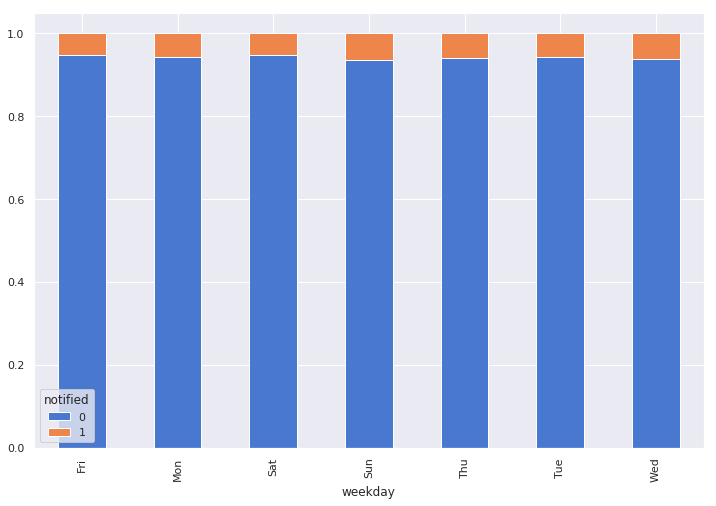

In [24]:
categorical_variable_exploration(dataset=training, column='weekday', predicted_column='notified', normalize=True, stacked=True)

### correlatedcount
- a number of records denoted by the system in an auxiliary table with localized alerts, that corresponds to the alert

Describe
count     39427.000000
mean        170.311462
std        5209.458108
min           1.000000
25%           1.000000
50%           2.000000
75%           8.000000
max      916736.000000
Name: correlatedcount, dtype: float64


Basic Histogram


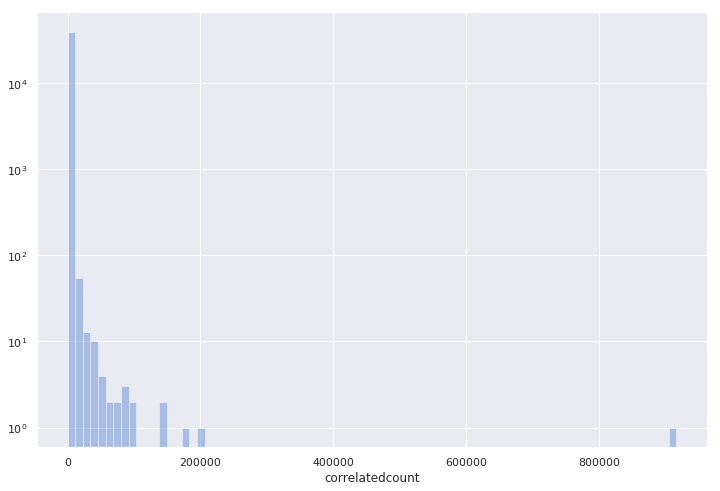

Histogram by  notified
not_notified count     37151.000000
mean        107.802428
std        1934.451802
min           1.000000
25%           1.000000
50%           2.000000
75%           8.000000
max      198055.000000
Name: correlatedcount, dtype: float64


notified:  count      2276.000000
mean       1190.642355
std       20201.478279
min           1.000000
25%           1.000000
50%           3.000000
75%          33.250000
max      916736.000000
Name: correlatedcount, dtype: float64




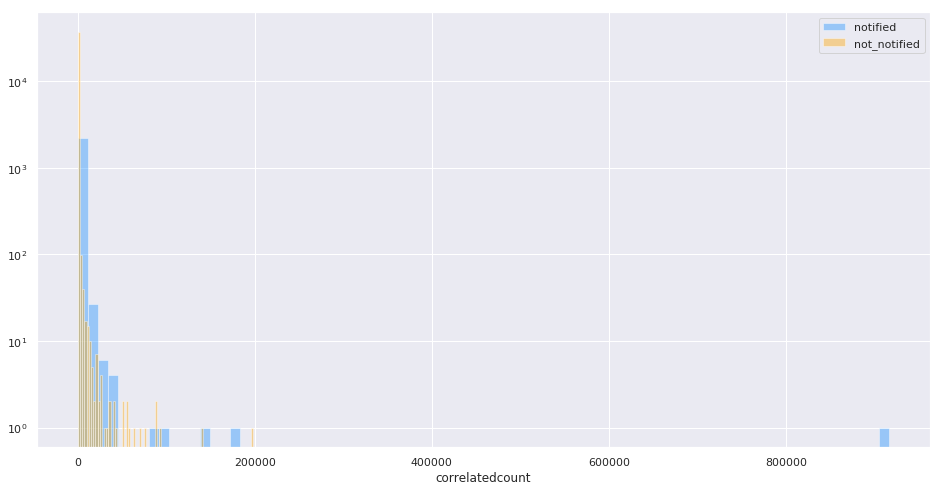

In [25]:
joint_variable_exploration(dataset=training, column='correlatedcount', predicted_column='notified', bin_num=80, quantile=1, log_scale=True, no_notify=True, notify=True)

### n1, n2 , ... , n10
- a binary fields indicating whether a standard system query1 returned value > 0 (it can be understood as a result of a standard analytical query)
- n1, n2, n9 could have an impact

In [26]:
column_list = []
for i in range(1,11):
    column_list.append("n"+str(i))

training[column_list].apply(pd.Series.value_counts)

,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10
0.0,6826,7112,4717,5480,4668,3769,7132.0,7132.0,7006,7132.0
1.0,306,20,2415,1652,2464,3363,NaN,NaN,126,NaN


Describe
count    7132.000000
mean        0.042905
std         0.202658
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: n1, dtype: float64


Value counts
0.0    6826
1.0     306
Name: n1, dtype: int64


Value caunts by  notified
notified         0         1
n1                          
0.0       0.962350  0.037650
1.0       0.866013  0.133987




<Figure size 864x576 with 0 Axes>

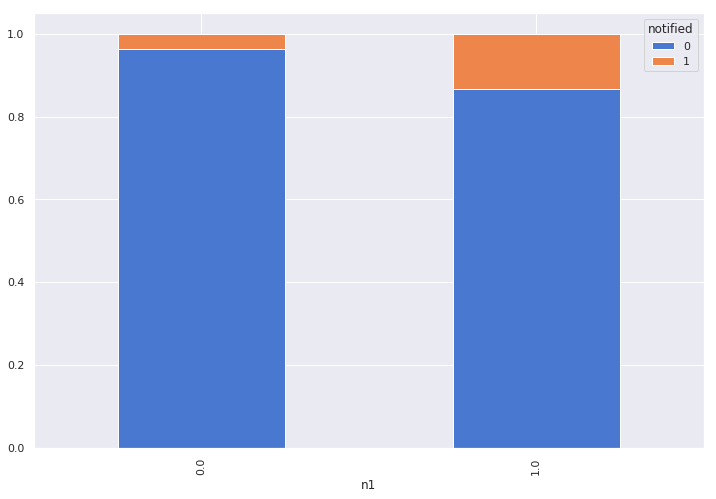

Describe
count    7132.000000
mean        0.002804
std         0.052885
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: n2, dtype: float64


Value counts
0.0    7112
1.0      20
Name: n2, dtype: int64


Value caunts by  notified
notified         0         1
n2                          
0.0       0.958521  0.041479
1.0       0.850000  0.150000




<Figure size 864x576 with 0 Axes>

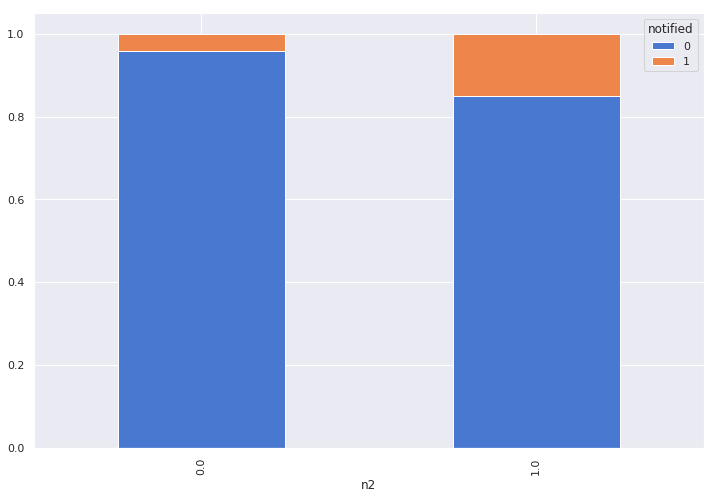

Describe
count    7132.000000
mean        0.338615
std         0.473272
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: n3, dtype: float64


Value counts
0.0    4717
1.0    2415
Name: n3, dtype: int64


Value caunts by  notified
notified         0         1
n3                          
0.0       0.959508  0.040492
1.0       0.955694  0.044306




<Figure size 864x576 with 0 Axes>

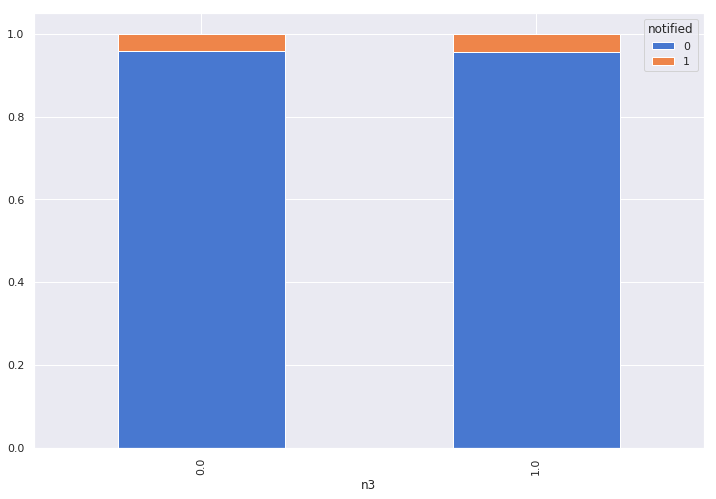

Describe
count    7132.000000
mean        0.231632
std         0.421905
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: n4, dtype: float64


Value counts
0.0    5480
1.0    1652
Name: n4, dtype: int64


Value caunts by  notified
notified         0         1
n4                          
0.0       0.961131  0.038869
1.0       0.948547  0.051453




<Figure size 864x576 with 0 Axes>

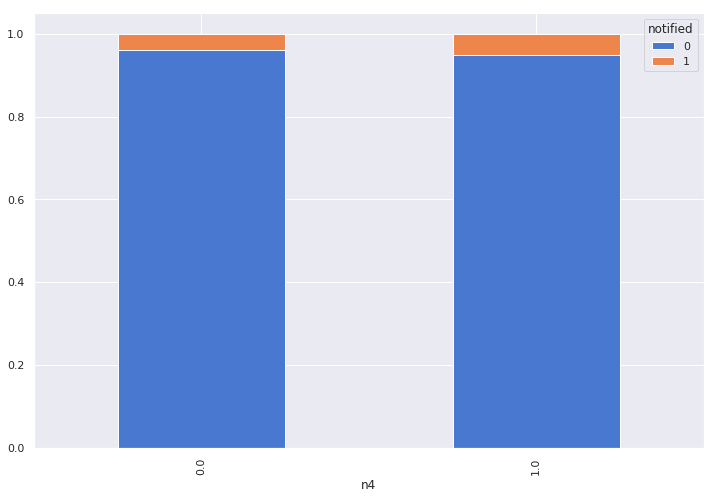

Describe
count    7132.000000
mean        0.345485
std         0.475560
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: n5, dtype: float64


Value counts
0.0    4668
1.0    2464
Name: n5, dtype: int64


Value caunts by  notified
notified         0         1
n5                          
0.0       0.958869  0.041131
1.0       0.956981  0.043019




<Figure size 864x576 with 0 Axes>

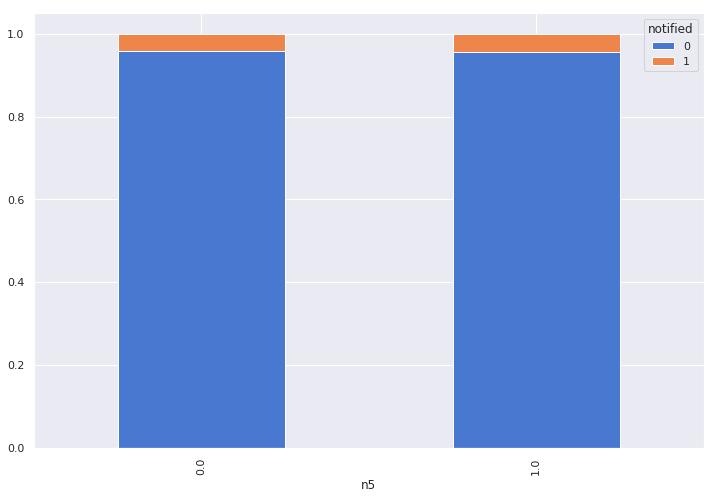

Describe
count    7132.000000
mean        0.471537
std         0.499224
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: n6, dtype: float64


Value counts
0.0    3769
1.0    3363
Name: n6, dtype: int64


Value caunts by  notified
notified         0         1
n6                          
0.0       0.954099  0.045901
1.0       0.962831  0.037169




<Figure size 864x576 with 0 Axes>

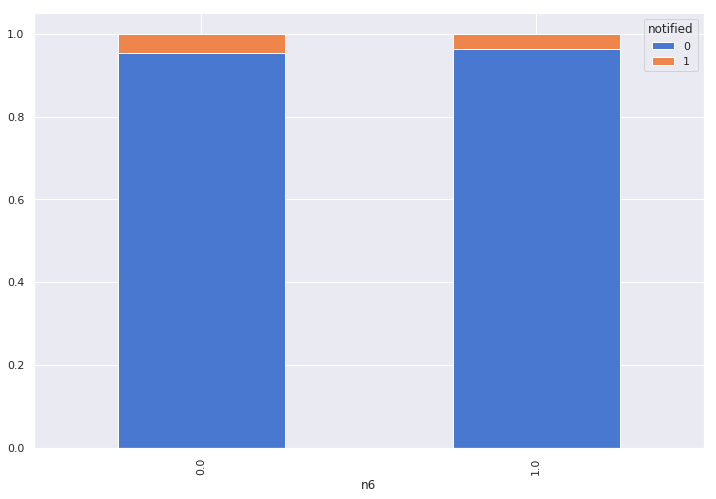

Describe
count    7132.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: n7, dtype: float64


Value counts
0.0    7132
Name: n7, dtype: int64


Value caunts by  notified
notified         0         1
n7                          
0.0       0.958216  0.041784




<Figure size 864x576 with 0 Axes>

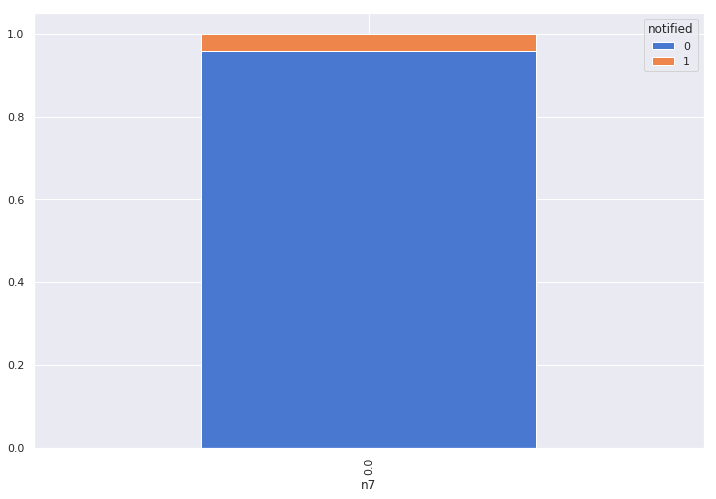

Describe
count    7132.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: n8, dtype: float64


Value counts
0.0    7132
Name: n8, dtype: int64


Value caunts by  notified
notified         0         1
n8                          
0.0       0.958216  0.041784




<Figure size 864x576 with 0 Axes>

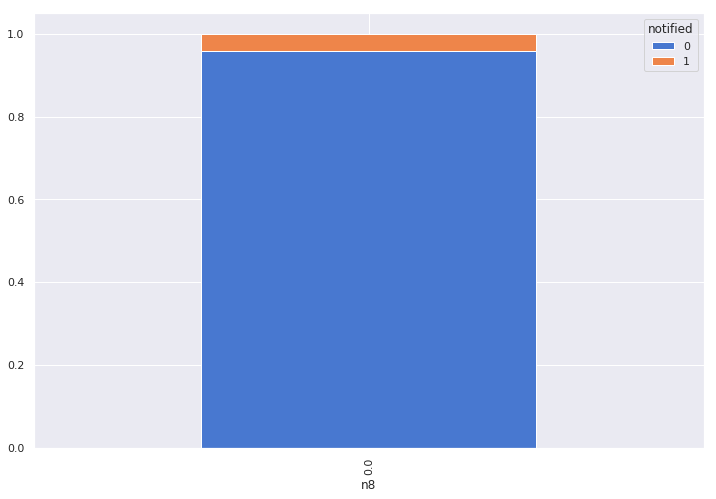

Describe
count    7132.000000
mean        0.017667
std         0.131747
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: n9, dtype: float64


Value counts
0.0    7006
1.0     126
Name: n9, dtype: int64


Value caunts by  notified
notified         0         1
n9                          
0.0       0.960177  0.039823
1.0       0.849206  0.150794




<Figure size 864x576 with 0 Axes>

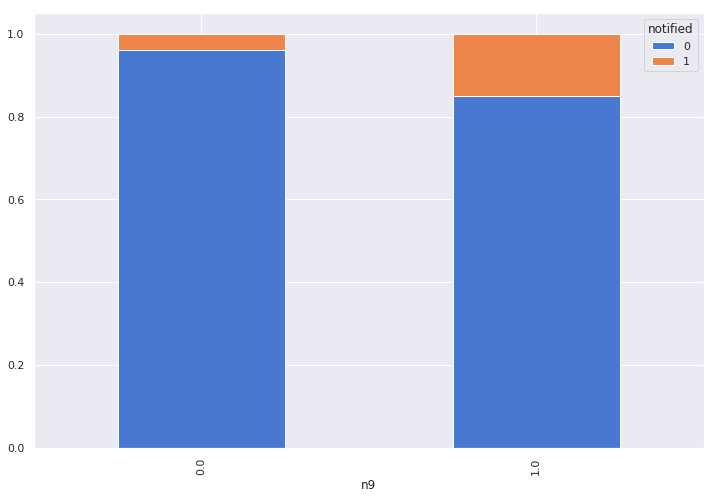

Describe
count    7132.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: n10, dtype: float64


Value counts
0.0    7132
Name: n10, dtype: int64


Value caunts by  notified
notified         0         1
n10                         
0.0       0.958216  0.041784




<Figure size 864x576 with 0 Axes>

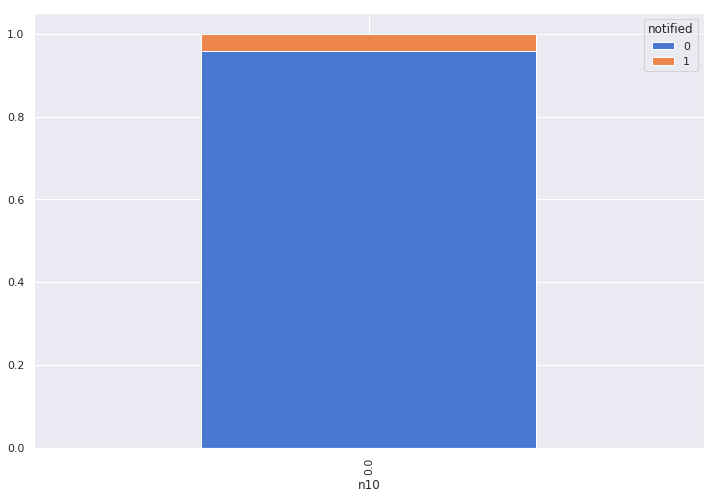

In [27]:
for column in column_list:
    #print(training.groupby([column,'notified']).size())
    categorical_variable_exploration(dataset=training, column=column, predicted_column='notified', normalize=True, stacked=True)

### score
- a score related to the alert, issued by an autonomous analytical model
- 7 - not notified

Describe
count     7132.0
unique       8.0
top          1.0
freq      2454.0
Name: score, dtype: float64


Value counts
1.0    2454
3.0    1753
0.0    1037
4.0     978
2.0     637
5.0     243
6.0      28
7.0       2
Name: score, dtype: int64


Value caunts by  notified
notified         0         1
score                       
0.0       0.942141  0.057859
1.0       0.974328  0.025672
2.0       0.948195  0.051805
3.0       0.972048  0.027952
4.0       0.937628  0.062372
5.0       0.888889  0.111111
6.0       0.821429  0.178571
7.0       1.000000       NaN




<Figure size 864x576 with 0 Axes>

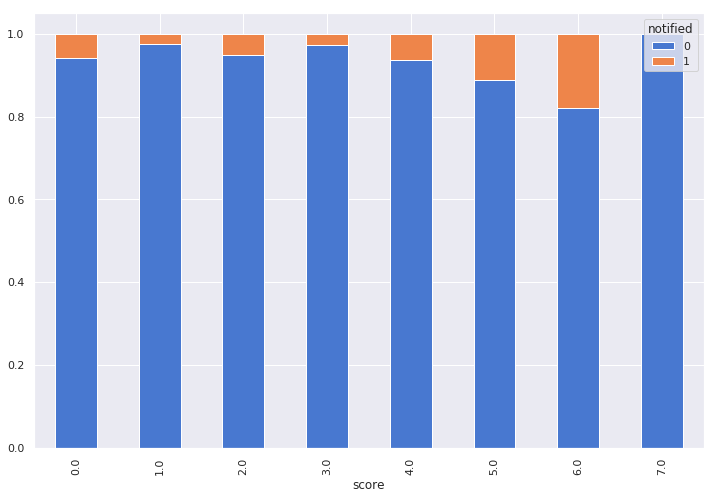

In [28]:
categorical_variable_exploration(dataset=training, column='score', predicted_column='notified', normalize=True, stacked=True)

### srcip_cd
- a number of different source IP addresses in an auxiliary table with localized alerts, that corresponds to the alert

Describe
count    39427.000000
mean        18.417531
std        228.763900
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max      10920.000000
Name: srcip_cd, dtype: float64


Basic Histogram


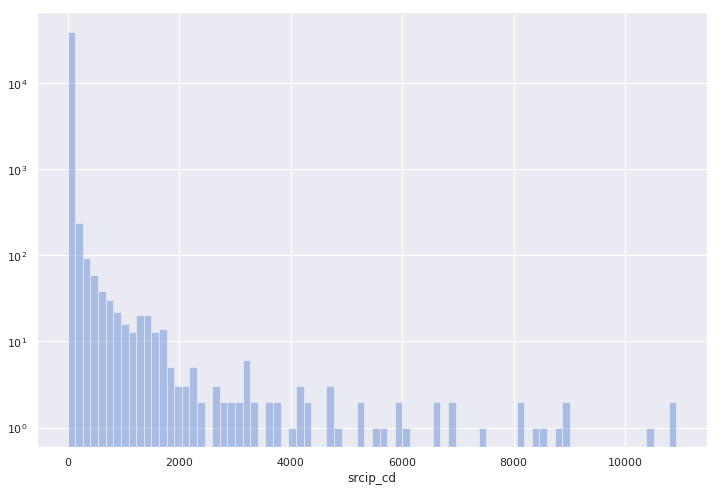

Histogram by  notified
not_notified count    37151.000000
mean        16.206562
std        197.827252
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max      10863.000000
Name: srcip_cd, dtype: float64


notified:  count     2276.000000
mean        54.507030
std        516.217626
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max      10920.000000
Name: srcip_cd, dtype: float64




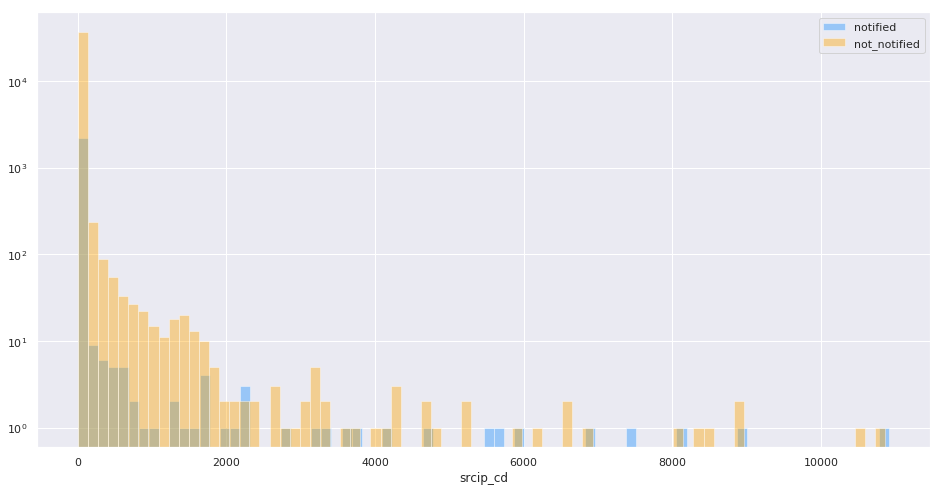

In [29]:
joint_variable_exploration(dataset=training, column='srcip_cd', predicted_column='notified', bin_num=80, quantile=1, log_scale=True, no_notify=True, notify=True)

### dstip_cd
- a number of destination IP addresses in an auxiliary table with localized alerts, that corresponds to the alert
- more than 13713 -> notifiy

Describe
count    39427.000000
mean        10.099323
std        254.941792
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max      20587.000000
Name: dstip_cd, dtype: float64


Basic Histogram


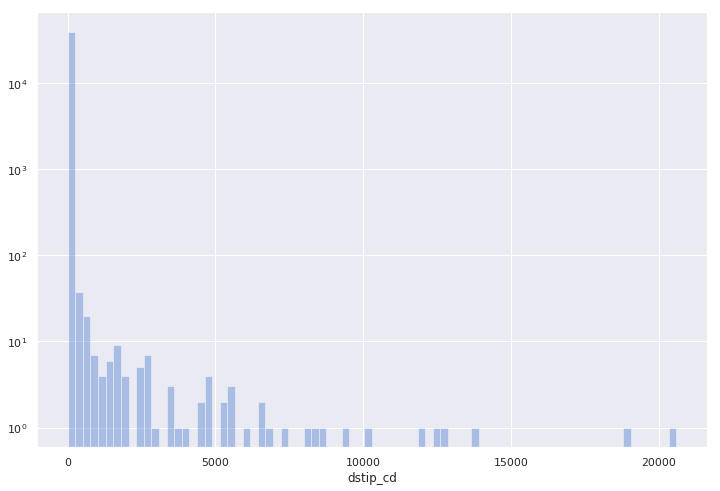

Histogram by  notified
not_notified count    37151.000000
mean         6.370865
std        178.928360
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max      13713.000000
Name: dstip_cd, dtype: float64


notified:  count     2276.000000
mean        70.958699
std        774.366348
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max      20587.000000
Name: dstip_cd, dtype: float64




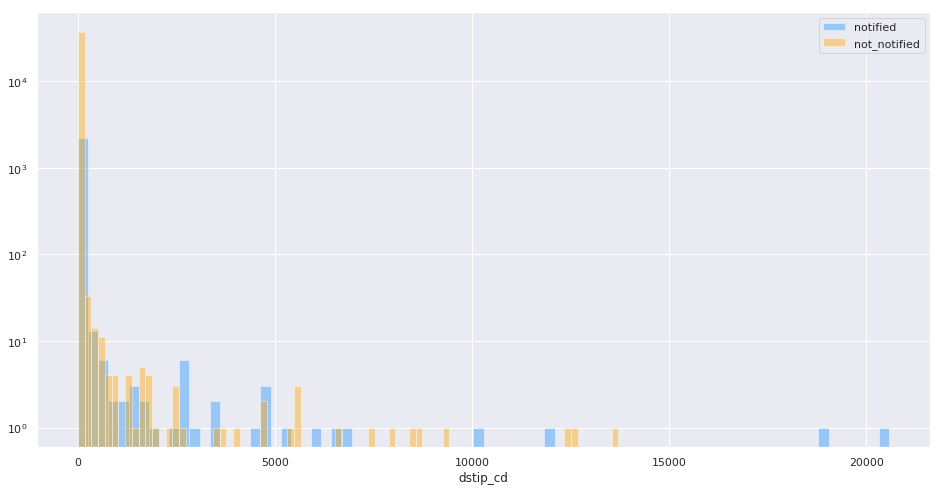

In [30]:
joint_variable_exploration(dataset=training, column='dstip_cd', predicted_column='notified', bin_num=80, quantile=1, log_scale=True, no_notify=True, notify=True)

### srcport_cd
- a number of different source ports in an auxiliary table with localized alerts, that corresponds to the alert

Describe
count    39427.000000
mean        54.620590
std        794.015422
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max      64486.000000
Name: srcport_cd, dtype: float64


Basic Histogram


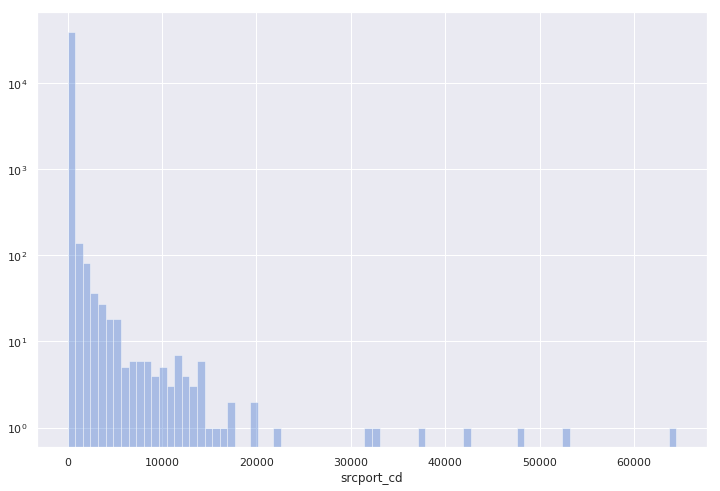

Histogram by  notified
not_notified count    37151.000000
mean        42.914000
std        620.865765
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max      47814.000000
Name: srcport_cd, dtype: float64


notified:  count     2276.000000
mean       245.706503
std       2143.015059
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max      64486.000000
Name: srcport_cd, dtype: float64




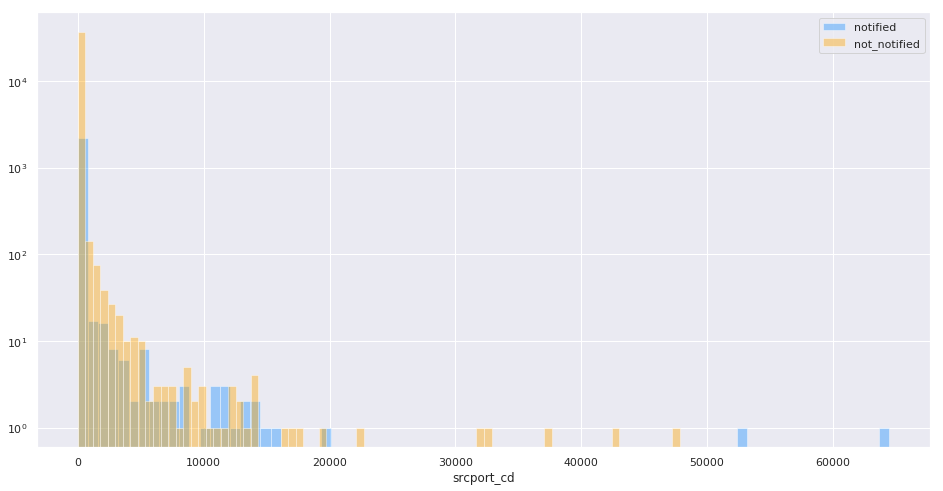

In [31]:
joint_variable_exploration(dataset=training, column='srcport_cd', predicted_column='notified', bin_num=80, quantile=1, log_scale=True, no_notify=True, notify=True)

### dstport_cd
- a number of different destination ports in an auxiliary table with localized alerts, that corresponds to the alert

Describe
count    39427.000000
mean         9.951277
std        206.126482
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max      13394.000000
Name: dstport_cd, dtype: float64


Basic Histogram


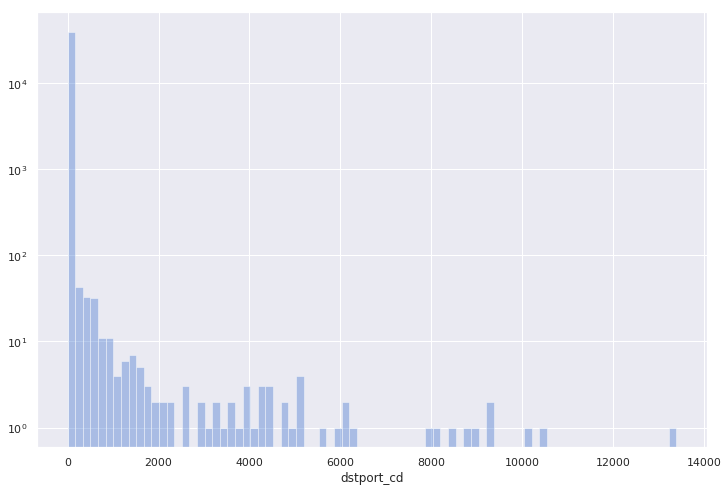

Histogram by  notified
not_notified count    37151.000000
mean         7.984011
std        179.558262
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max      13394.000000
Name: dstport_cd, dtype: float64


notified:  count     2276.000000
mean        42.062830
std        456.882295
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max      10412.000000
Name: dstport_cd, dtype: float64




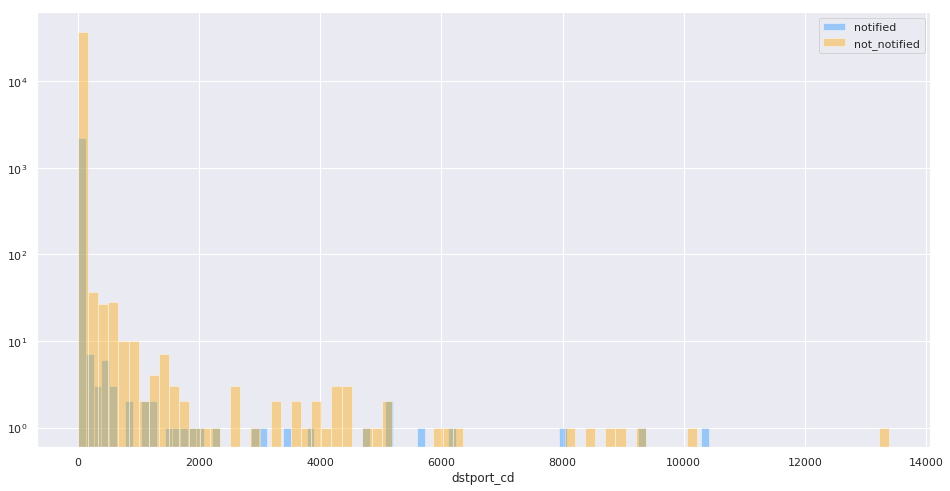

In [32]:
joint_variable_exploration(dataset=training, column='dstport_cd', predicted_column='notified', bin_num=80, quantile=1, log_scale=True, no_notify=True, notify=True)

### alerttype_cd
- a number of triggered alert types, denoted in an auxiliary table with localized alerts

Describe
count    39427.000000
mean         0.637000
std          0.752357
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: alerttype_cd, dtype: float64


Value counts
0     19247
1     16443
2      2867
3       639
4       162
5        49
6        15
7         4
10        1
Name: alerttype_cd, dtype: int64


Value caunts by  notified
notified             0         1
alerttype_cd                    
0             0.931418  0.068582
1             0.965639  0.034361
2             0.915940  0.084060
3             0.848200  0.151800
4             0.814815  0.185185
5             0.693878  0.306122
6             0.533333  0.466667
7             0.750000  0.250000
10            1.000000       NaN




<Figure size 864x576 with 0 Axes>

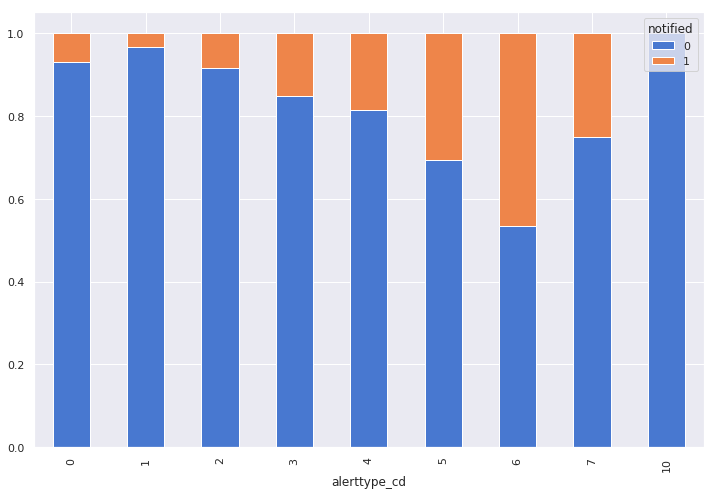

In [33]:
categorical_variable_exploration(dataset=training, column='alerttype_cd', predicted_column='notified', normalize=True, stacked=True)

### direction_cd
- a number of different event directions denoted in an auxiliary table with localized alerts, that corresponds to the alert
- categorical

Describe
count    39427.000000
mean         0.551526
std          0.572366
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: direction_cd, dtype: float64


Value counts
0    19247
1    18629
2     1539
3       11
5        1
Name: direction_cd, dtype: int64


Value caunts by  notified
notified             0         1
direction_cd                    
0             0.931418  0.068582
1             0.954319  0.045681
2             0.935023  0.064977
3             0.545455  0.454545
5             1.000000       NaN




<Figure size 864x576 with 0 Axes>

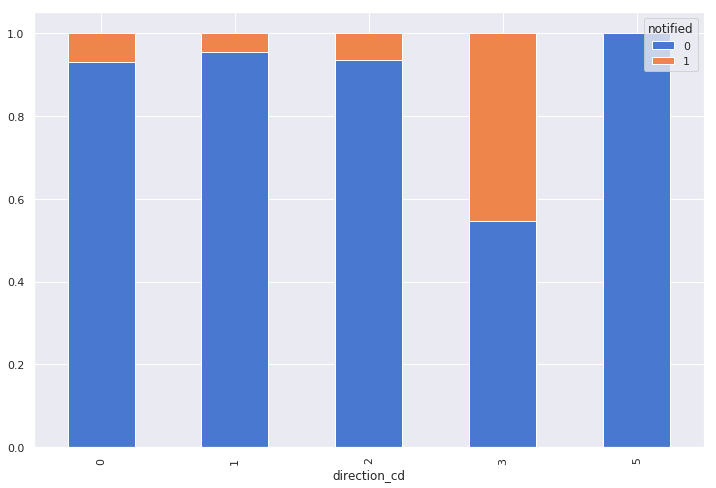

In [34]:
categorical_variable_exploration(dataset=training, column='direction_cd', predicted_column='notified', normalize=True, stacked=True)

### eventname_cd
- a number of different event names (names of events that are dependent on the hardware) denoted in an auxiliary table with localized alerts, that corresponds to the alert
- categorical

Describe
count    39427.000000
mean         0.664012
std          0.824106
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: eventname_cd, dtype: float64


Value counts
0    19686
1    15128
2     3314
3      924
4      257
5       94
6       16
7        6
8        2
Name: eventname_cd, dtype: int64


Value caunts by  notified
notified             0         1
eventname_cd                    
0             0.932541  0.067459
1             0.956967  0.043033
2             0.937236  0.062764
3             0.940476  0.059524
4             0.894942  0.105058
5             0.925532  0.074468
6             1.000000       NaN
7             1.000000       NaN
8             1.000000       NaN




<Figure size 864x576 with 0 Axes>

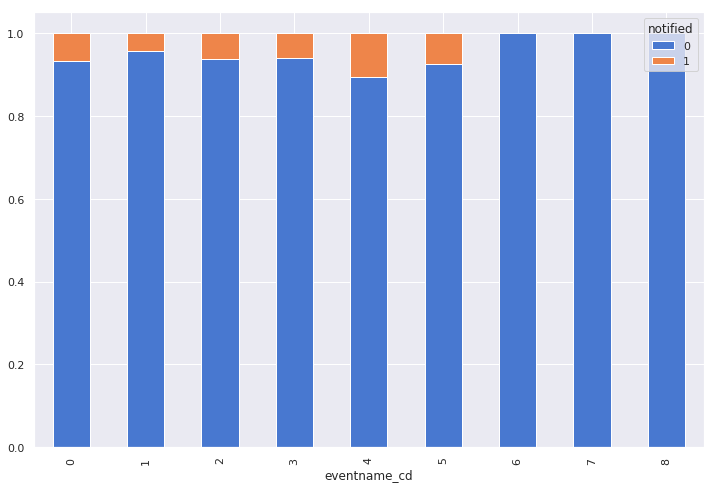

In [35]:
categorical_variable_exploration(dataset=training, column='eventname_cd', predicted_column='notified', normalize=True, stacked=True)

### severity_cd
- a number of different severity values associated with individual events denoted in an auxiliary table with localized alerts, that corresponds to the alert
- categorical

Describe
count    39427.000000
mean         0.645928
std          0.803646
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: severity_cd, dtype: float64


Value counts
0    19247
1    16879
2     2033
3      782
4      254
5      232
Name: severity_cd, dtype: int64


Value caunts by  notified
notified            0         1
severity_cd                    
0            0.931418  0.068582
1            0.967593  0.032407
2            0.903591  0.096409
3            0.868286  0.131714
4            0.783465  0.216535
5            0.762931  0.237069




<Figure size 864x576 with 0 Axes>

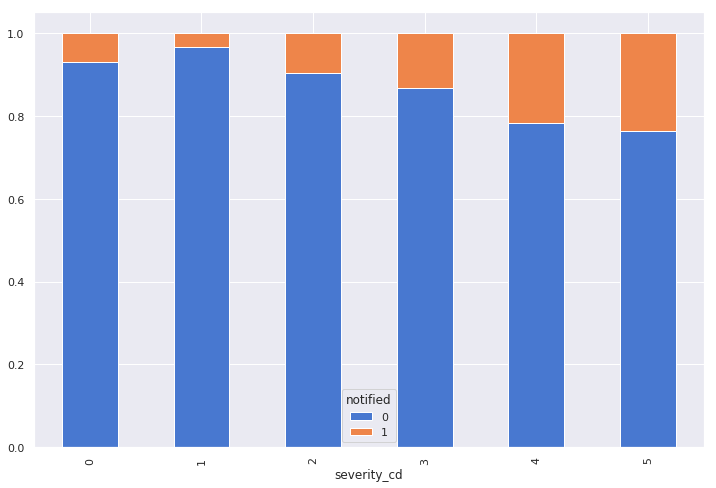

In [36]:
categorical_variable_exploration(dataset=training, column='severity_cd', predicted_column='notified', normalize=True, stacked=True)

### reportingdevice_cd
- a number of different reporting devices (devices that register the events) denoted in an auxiliary table with localized alerts, that corresponds to the alert


Describe
count    39427.000000
mean         0.711847
std          2.010532
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max        154.000000
Name: reportingdevice_cd, dtype: float64


Value counts
0      19247
1      17091
2       1958
3        487
4        180
5        116
6        113
7         48
8         27
9         27
13        15
11        13
12        13
14        10
21        10
24         9
17         8
23         7
10         7
15         6
25         6
20         5
22         5
18         4
19         4
16         2
26         2
36         1
30         1
154        1
146        1
151        1
153        1
46         1
Name: reportingdevice_cd, dtype: int64


Value caunts by  notified
notified                   0         1
reportingdevice_cd                    
0                   0.931418  0.068582
1                   0.951202  0.048798
2                   0.949949  0.050051
3                   0.967146  0.032854
4               

<Figure size 864x576 with 0 Axes>

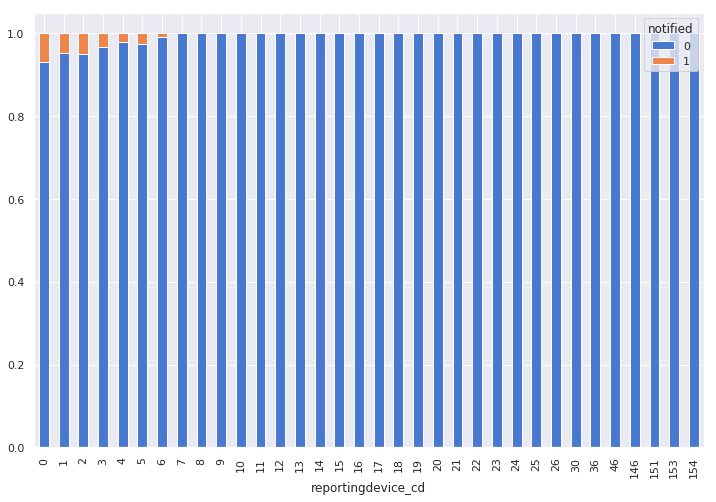

In [37]:
categorical_variable_exploration(dataset=training, column='reportingdevice_cd', predicted_column='notified', normalize=True, stacked=True)

### devicetype_cd
- a number of different reporting device types denoted in an auxiliary table with localized alerts, that corresponds to the alert


Describe
count    39427.000000
mean         0.524590
std          0.545056
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: devicetype_cd, dtype: float64


Value counts
0    19650
1    18901
2      849
3       25
5        1
4        1
Name: devicetype_cd, dtype: int64


Value caunts by  notified
notified              0         1
devicetype_cd                    
0              0.932519  0.067481
1              0.951854  0.048146
2              0.955241  0.044759
3              0.920000  0.080000
4              1.000000       NaN
5              1.000000       NaN




<Figure size 864x576 with 0 Axes>

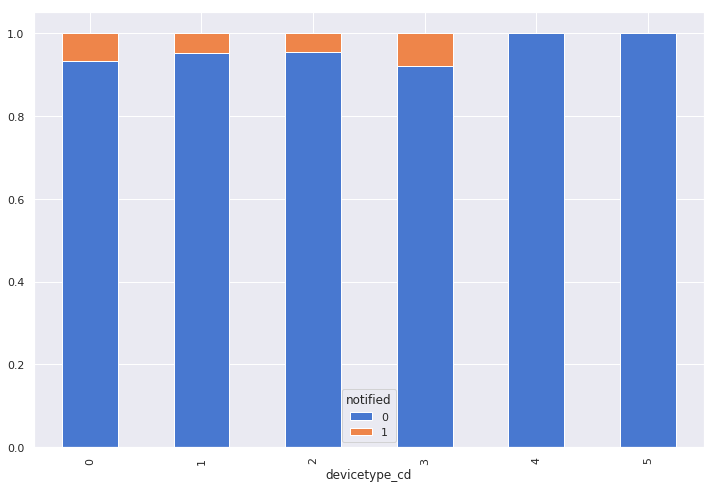

In [38]:
categorical_variable_exploration(dataset=training, column='devicetype_cd', predicted_column='notified', normalize=True, stacked=True)

### devicevendor_cd
- a number of different reporting device vendors denoted in an auxiliary table with localized alerts, that corresponds to the alert

Describe
count    39427.000000
mean         0.543714
std          0.587484
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          7.000000
Name: devicevendor_cd, dtype: float64


Value counts
0    19650
1    18358
2     1184
3      232
4        2
7        1
Name: devicevendor_cd, dtype: int64


Value caunts by  notified
notified                0         1
devicevendor_cd                    
0                0.932519  0.067481
1                0.951356  0.048644
2                0.956081  0.043919
3                0.978448  0.021552
4                1.000000       NaN
7                1.000000       NaN




<Figure size 864x576 with 0 Axes>

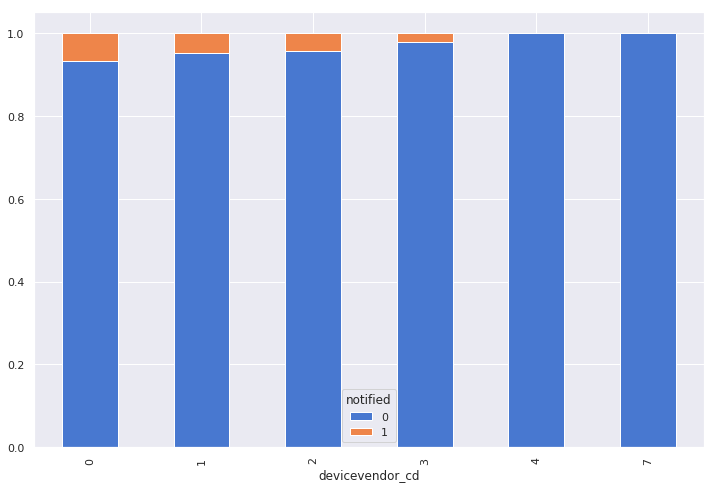

In [39]:
categorical_variable_exploration(dataset=training, column='devicevendor_cd', predicted_column='notified', normalize=True, stacked=True)

### domain_cd
- a number of different domains denoted in an auxiliary table with localized alerts, that corresponds to the alert

Describe
count    39427.000000
mean         1.088467
std         76.631637
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       8924.000000
Name: domain_cd, dtype: float64


Basic Histogram


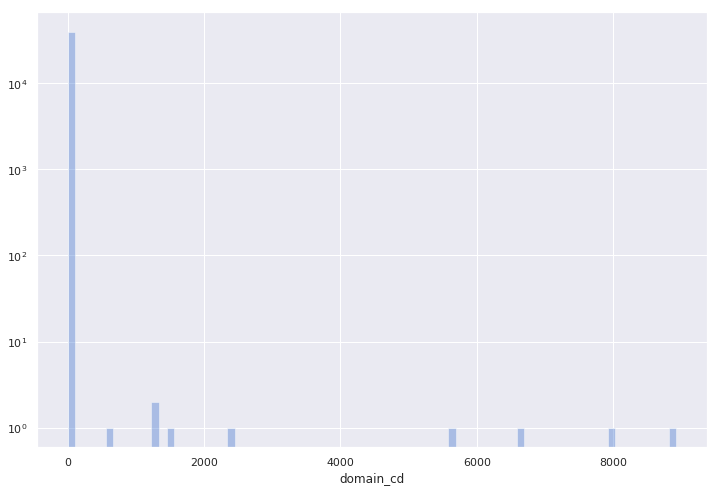

Histogram by  notified
not_notified count    37151.000000
mean         1.149740
std         78.942965
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       8924.000000
Name: domain_cd, dtype: float64


notified:  count    2276.000000
mean        0.088313
std         1.428632
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        44.000000
Name: domain_cd, dtype: float64




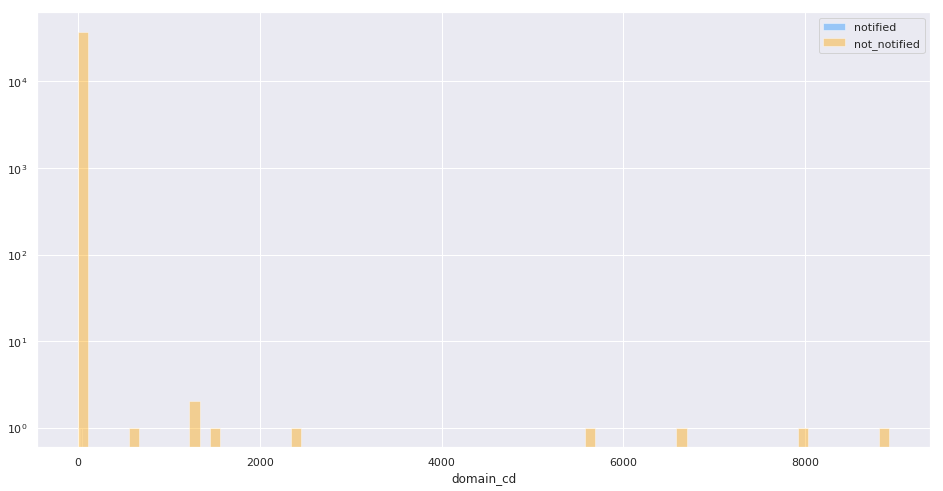

In [40]:
joint_variable_exploration(dataset=training, column='domain_cd', predicted_column='notified', bin_num=80, quantile=1, log_scale=True, no_notify=True, notify=True)

### protocol_cd
- a number of different protocols denoted in an auxiliary table with localized alerts, that corresponds to the alert

Describe
count    39427.000000
mean         0.455627
std         11.565941
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max       1302.000000
Name: protocol_cd, dtype: float64


Value counts
0       27917
1        9993
2        1260
3         185
4          51
5           8
6           3
8           1
1277        1
1302        1
42          1
11          1
13          1
14          1
881         1
1077        1
9           1
Name: protocol_cd, dtype: int64


Value caunts by  notified
notified            0         1
protocol_cd                    
0            0.942580  0.057420
1            0.947363  0.052637
2            0.909524  0.090476
3            0.848649  0.151351
4            0.980392  0.019608
5            0.750000  0.250000
6            1.000000       NaN
8                 NaN  1.000000
9            1.000000       NaN
11           1.000000       NaN
13                NaN  1.000000
14           1.000000       NaN
42           1.00000

<Figure size 864x576 with 0 Axes>

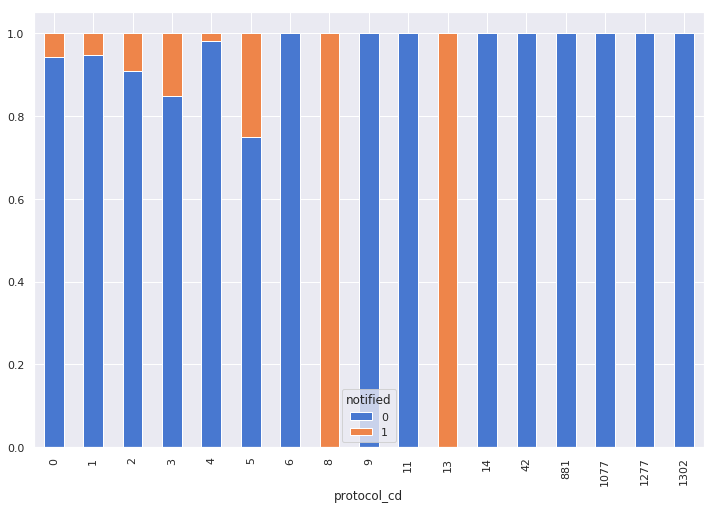

In [41]:
categorical_variable_exploration(dataset=training, column='protocol_cd', predicted_column='notified', normalize=True, stacked=True)

### username_cd
- a number of different usernames denoted in an auxiliary table with localized alerts, that corresponds to the alert

Describe
count    39427.000000
mean         0.671418
std          9.638613
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        710.000000
Name: username_cd, dtype: float64


Basic Histogram


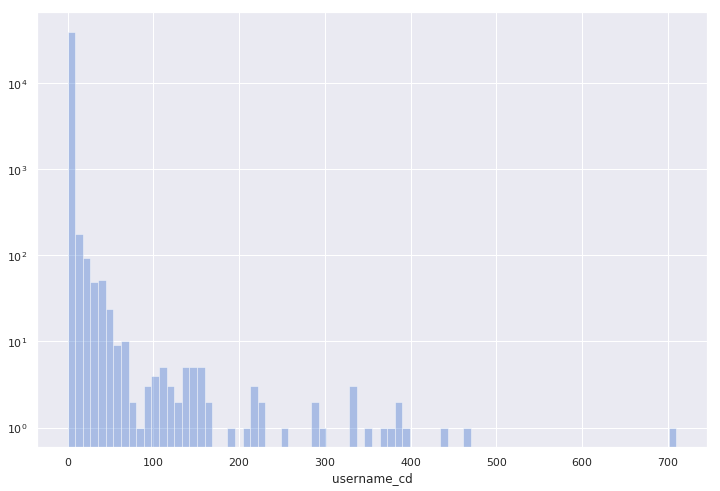

Histogram by  notified
not_notified count    37151.000000
mean         0.705903
std          9.915911
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        710.000000
Name: username_cd, dtype: float64


notified:  count    2276.000000
mean        0.108524
std         2.015129
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        92.000000
Name: username_cd, dtype: float64




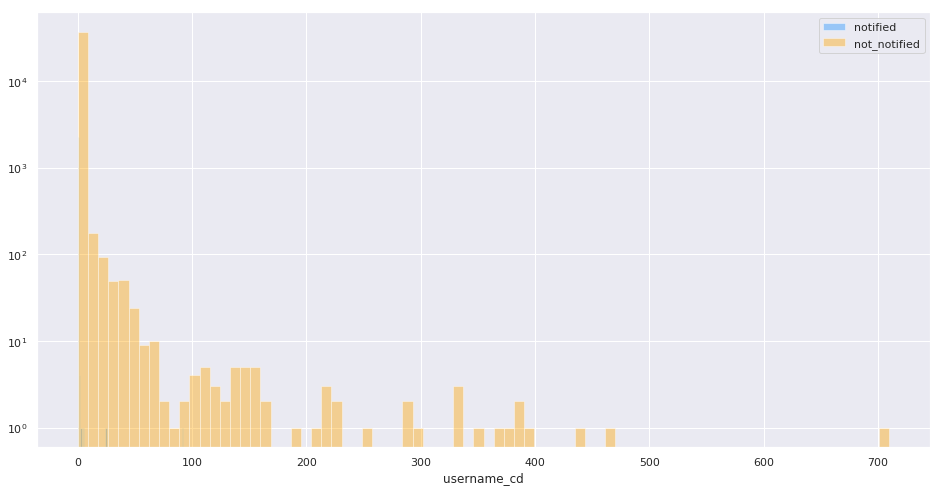

In [42]:
joint_variable_exploration(dataset=training, column='username_cd', predicted_column='notified', bin_num=80, quantile=1, log_scale=True, no_notify=True, notify=True)

### srcipcategory_cd
- a number of different source IP categories denoted in an auxiliary table with localized alerts, that corresponds to the alert

Describe
count    39427.000000
mean         0.616050
std          0.699874
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: srcipcategory_cd, dtype: float64


Value counts
0    19247
1    16895
2     2521
3      704
4       60
Name: srcipcategory_cd, dtype: int64


Value caunts by  notified
notified                 0         1
srcipcategory_cd                    
0                 0.931418  0.068582
1                 0.948801  0.051199
2                 0.967473  0.032527
3                 0.987216  0.012784
4                 1.000000       NaN




<Figure size 864x576 with 0 Axes>

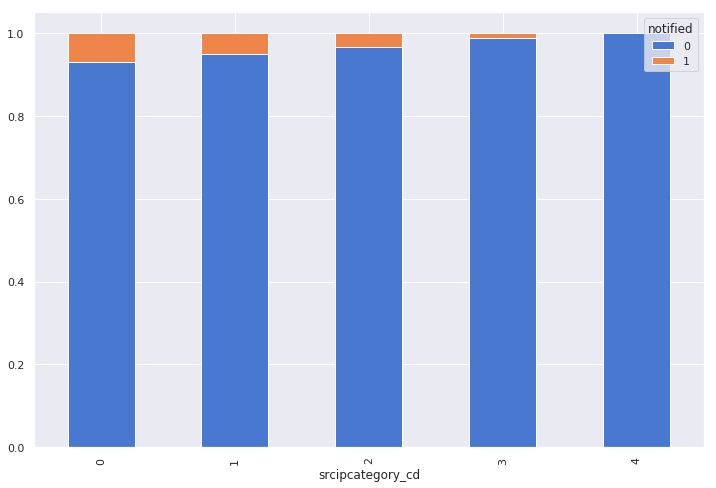

In [43]:
categorical_variable_exploration(dataset=training, column='srcipcategory_cd', predicted_column='notified', normalize=True, stacked=True)

### dstipcategory_cd
- a number of different destination IP categories denoted in an auxiliary table with localized alerts, that corresponds to the alert

Describe
count    39427.000000
mean         0.529840
std          0.535496
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: dstipcategory_cd, dtype: float64


Value counts
1    19499
0    19247
2      655
3       23
4        3
Name: dstipcategory_cd, dtype: int64


Value caunts by  notified
notified                 0         1
dstipcategory_cd                    
0                 0.931418  0.068582
1                 0.955228  0.044772
2                 0.876336  0.123664
3                 0.913043  0.086957
4                 1.000000       NaN




<Figure size 864x576 with 0 Axes>

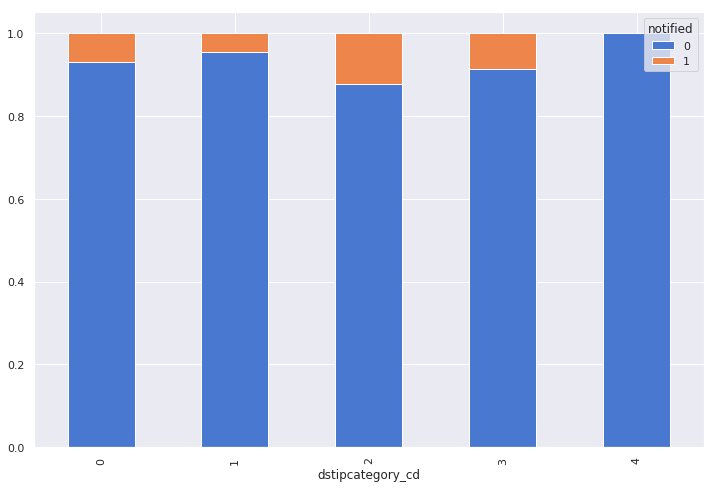

In [44]:
categorical_variable_exploration(dataset=training, column='dstipcategory_cd', predicted_column='notified', normalize=True, stacked=True)

### isiptrusted
- a binary field indicating whether the IP address corresponding to the alert is controlled by the customer

Describe
count    39427.000000
mean         0.361098
std          0.480325
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: isiptrusted, dtype: float64


Value counts
0    25190
1    14237
Name: isiptrusted, dtype: int64


Value caunts by  notified
notified            0         1
isiptrusted                    
0            0.967606  0.032394
1            0.897450  0.102550




<Figure size 864x576 with 0 Axes>

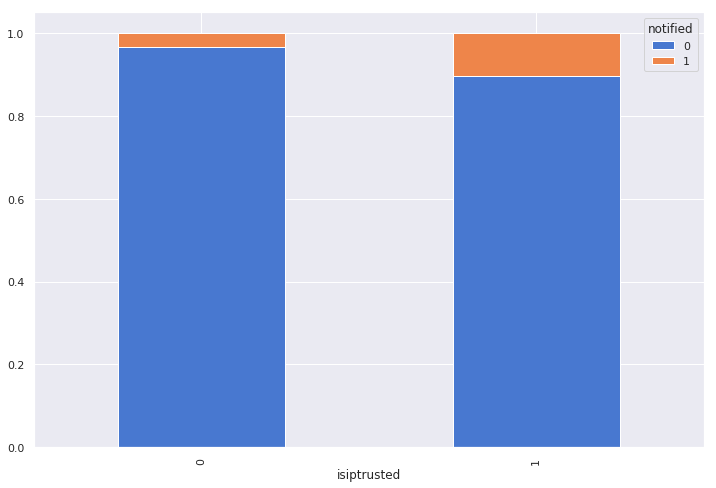

In [45]:
categorical_variable_exploration(dataset=training, column='isiptrusted', predicted_column='notified', normalize=True, stacked=True)

### untrustscore
- a score based on what is known about the external portion of the communication (network traffic) associated with the alert

Describe
count    39427.000000
mean         4.179217
std          1.235946
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: untrustscore, dtype: float64


Value counts
5    25021
3     5616
4     3650
2     3081
1     2059
Name: untrustscore, dtype: int64


Value caunts by  notified
notified             0         1
untrustscore                    
1             0.985915  0.014085
2             0.995131  0.004869
3             0.944444  0.055556
4             0.873699  0.126301
5             0.941689  0.058311




<Figure size 864x576 with 0 Axes>

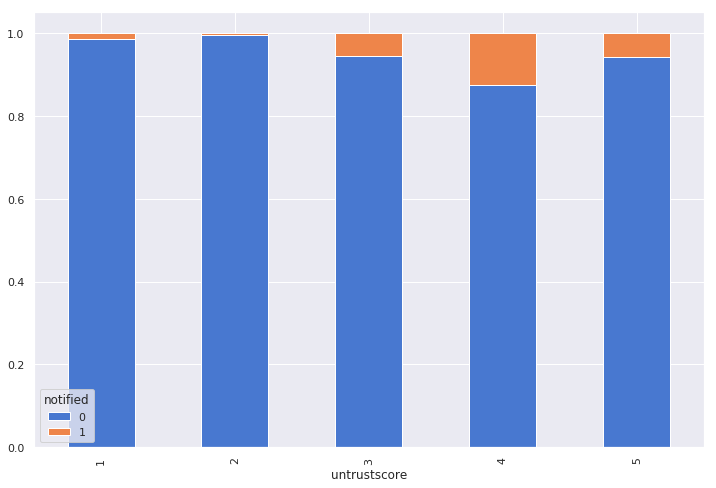

In [46]:
categorical_variable_exploration(dataset=training, column='untrustscore', predicted_column='notified', normalize=True, stacked=True)

### flowscore
- a behavioral score based on behavioral indicators adjusted for the alert

Describe
count    39427.000000
mean         3.324219
std          0.665902
min          3.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: flowscore, dtype: float64


Value counts
3    31066
5     4422
4     3939
Name: flowscore, dtype: int64


Value caunts by  notified
notified          0         1
flowscore                    
3          0.959860  0.040140
4          0.854532  0.145468
5          0.896879  0.103121




<Figure size 864x576 with 0 Axes>

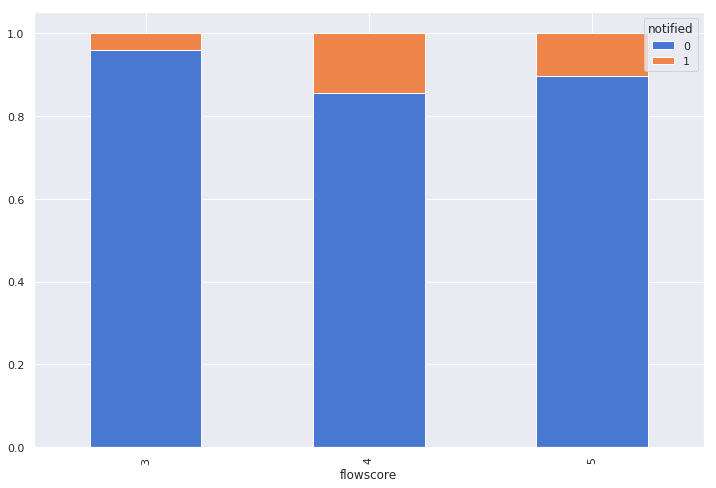

In [47]:
categorical_variable_exploration(dataset=training, column='flowscore', predicted_column='notified', normalize=True, stacked=True)

### trustscore
- a score based on what is known about the internal portion of the communication (network traffic) associated with the alert

Describe
count    39427.000000
mean         3.083344
std          0.397582
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: trustscore, dtype: float64


Value counts
3    37394
5     1456
4      493
2       49
1       35
Name: trustscore, dtype: int64


Value caunts by  notified
notified           0         1
trustscore                    
1           1.000000       NaN
2           0.877551  0.122449
3           0.941140  0.058860
4           0.947262  0.052738
5           0.970467  0.029533




<Figure size 864x576 with 0 Axes>

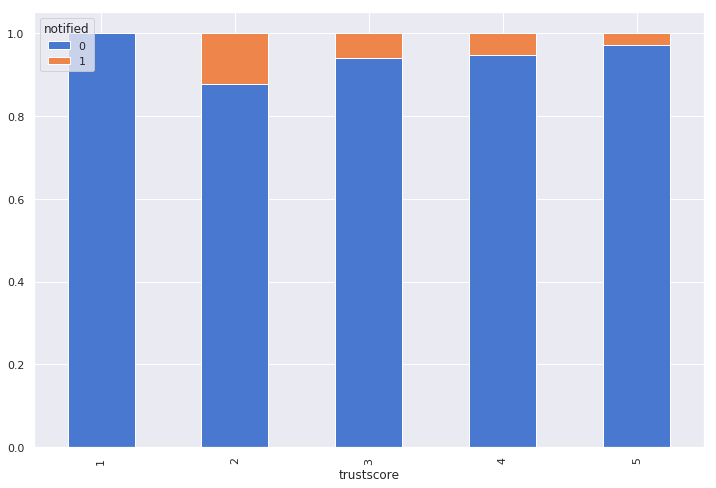

In [48]:
categorical_variable_exploration(dataset=training, column='trustscore', predicted_column='notified', normalize=True, stacked=True)

### enforcementscore
- an adjustment score based on whether or not the activity associated with the alert was mitigated by a security control

Describe
count    39427.000000
mean        -0.250006
std          0.433022
min         -1.000000
25%         -0.500000
50%          0.000000
75%          0.000000
max          0.000000
Name: enforcementscore, dtype: float64


Value counts
 0    29570
-1     9857
Name: enforcementscore, dtype: int64


Value caunts by  notified
notified                 0         1
enforcementscore                    
-1                0.931216  0.068784
 0                0.945959  0.054041




<Figure size 864x576 with 0 Axes>

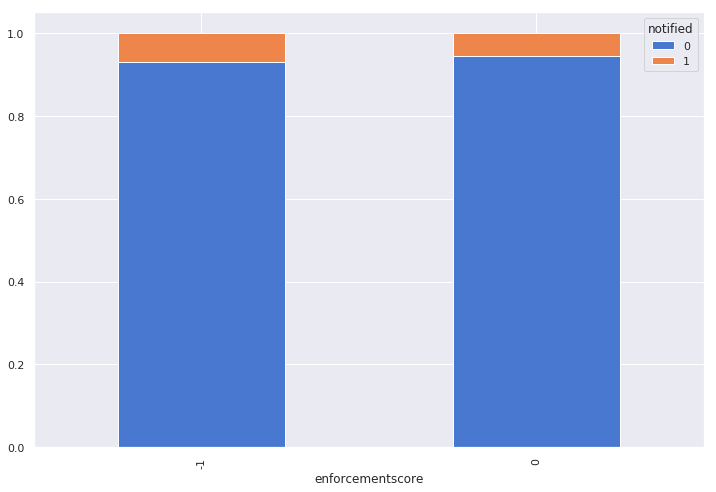

In [49]:
categorical_variable_exploration(dataset=training, column='enforcementscore', predicted_column='notified', normalize=True, stacked=True)

### dstipcategory_dominate
- the most frequent ipcategory_name for the destination addresses denoted in an auxiliary table with localized alerts, that corresponds to the alert


Describe
count        39427
unique           9
top       INTERNET
freq         37572
Name: dstipcategory_dominate, dtype: object


Value counts
INTERNET     37572
PRIV-10       1041
PRIV-CGN       417
PRIV-172       215
PRIV-192       176
BROADCAST        3
LOOPBACK         1
MULTICAST        1
CURR_NET         1
Name: dstipcategory_dominate, dtype: int64


Value caunts by  notified
notified                       0         1
dstipcategory_dominate                    
BROADCAST               1.000000       NaN
CURR_NET                1.000000       NaN
INTERNET                0.943628  0.056372
LOOPBACK                1.000000       NaN
MULTICAST               1.000000       NaN
PRIV-10                 0.888569  0.111431
PRIV-172                0.944186  0.055814
PRIV-192                0.840909  0.159091
PRIV-CGN                0.995204  0.004796




<Figure size 864x576 with 0 Axes>

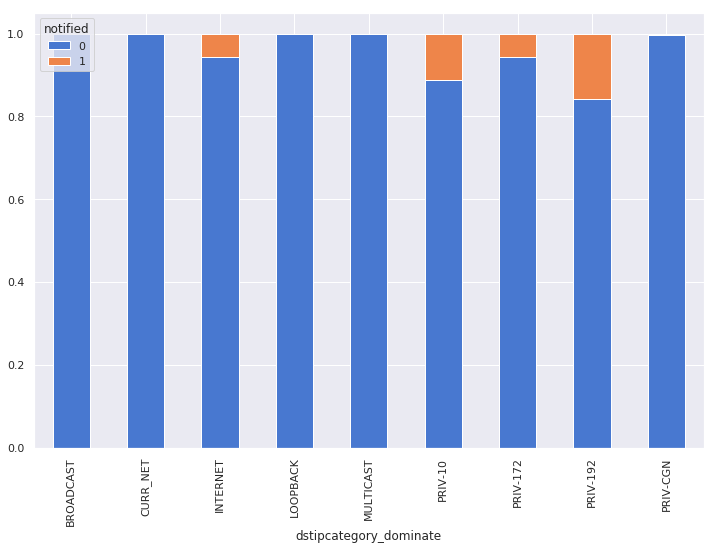

In [50]:
categorical_variable_exploration(dataset=training, column='dstipcategory_dominate', predicted_column='notified', normalize=True, stacked=True)

### srcipcategory_dominate
- the most frequent ipcategory_name for the source addresses denoted in an auxiliary table with localized alerts, that corresponds to the alert


Describe
count        39427
unique           7
top       INTERNET
freq         24146
Name: srcipcategory_dominate, dtype: object


Value counts
INTERNET      24146
PRIV-10        9757
PRIV-192       2719
PRIV-172       2521
PRIV-CGN        280
LOOPBACK          3
LINK-LOCAL        1
Name: srcipcategory_dominate, dtype: int64


Value caunts by  notified
notified                       0         1
srcipcategory_dominate                    
INTERNET                0.935517  0.064483
LINK-LOCAL              1.000000       NaN
LOOPBACK                1.000000       NaN
PRIV-10                 0.944553  0.055447
PRIV-172                0.969060  0.030940
PRIV-192                0.963222  0.036778
PRIV-CGN                1.000000       NaN




<Figure size 864x576 with 0 Axes>

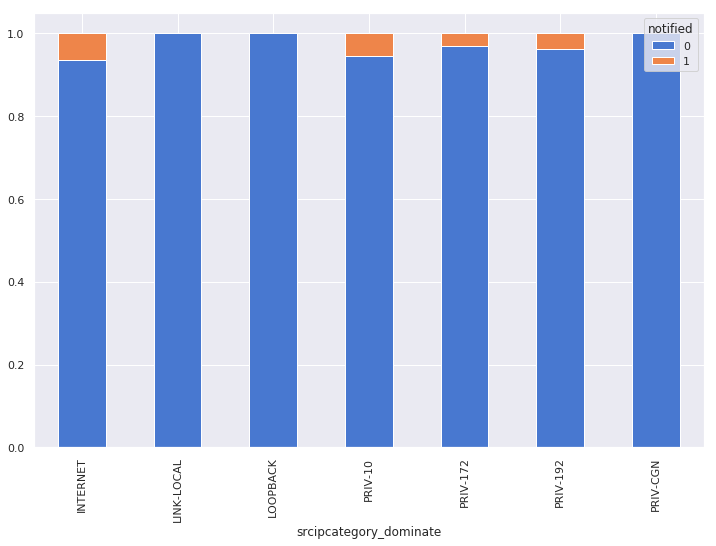

In [51]:
categorical_variable_exploration(dataset=training, column='srcipcategory_dominate', predicted_column='notified', normalize=True, stacked=True)

### dstportcategory_dominate
- the most frequent ipcategory_name for the destination port denoted in an auxiliary table with localized alerts, that corresponds to the alert


Describe
count    39427.000000
mean         1.055292
std          1.097137
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: dstportcategory_dominate, dtype: float64


Value counts
0    19657
2    17442
3     1353
4      563
1      412
Name: dstportcategory_dominate, dtype: int64


Value caunts by  notified
notified                         0         1
dstportcategory_dominate                    
0                         0.932543  0.067457
1                         0.898058  0.101942
2                         0.956943  0.043057
3                         0.899483  0.100517
4                         0.962700  0.037300




<Figure size 864x576 with 0 Axes>

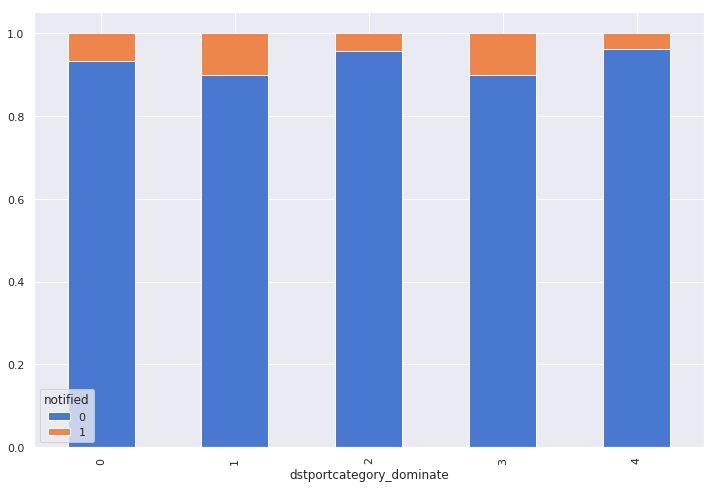

In [52]:
categorical_variable_exploration(dataset=training, column='dstportcategory_dominate', predicted_column='notified', normalize=True, stacked=True)

### srcportcategory_dominate
- the most frequent ipcategory_name for the source port denoted in an auxiliary table with localized alerts, that corresponds to the alert


Describe
count    39427.000000
mean         1.789966
std          1.863199
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max          4.000000
Name: srcportcategory_dominate, dtype: float64


Value counts
0    19657
4    13762
3     4220
2     1077
1      711
Name: srcportcategory_dominate, dtype: int64


Value caunts by  notified
notified                         0         1
srcportcategory_dominate                    
0                         0.932543  0.067457
1                         0.919831  0.080169
2                         0.924791  0.075209
3                         0.941943  0.058057
4                         0.958800  0.041200




<Figure size 864x576 with 0 Axes>

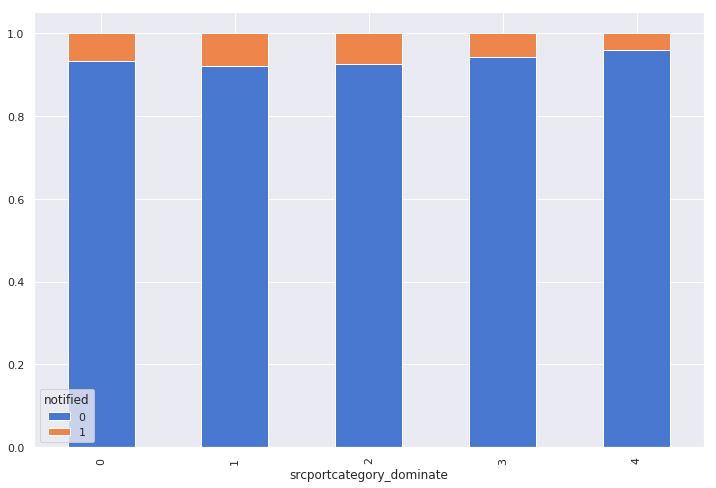

In [53]:
categorical_variable_exploration(dataset=training, column='srcportcategory_dominate', predicted_column='notified', normalize=True, stacked=True)

### thrcnt_month
- a number of records from an auxiliary table with threat watch alerts, denoted for the same IP address as the alert, during the previous month


Describe
count    39427.000000
mean      4962.427169
std       6930.008726
min          1.000000
25%         27.000000
50%        280.000000
75%       9879.000000
max      25064.000000
Name: thrcnt_month, dtype: float64


Basic Histogram


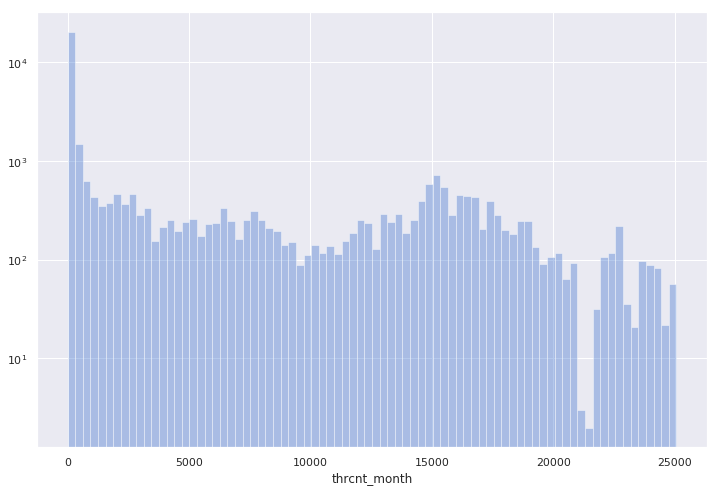

Histogram by  notified
not_notified count    37151.000000
mean      5224.769912
std       7029.644223
min          1.000000
25%         29.000000
50%        374.000000
75%      11205.000000
max      25064.000000
Name: thrcnt_month, dtype: float64


notified:  count     2276.000000
mean       680.223638
std       2421.640435
min          1.000000
25%          8.000000
50%         51.000000
75%        195.000000
max      24300.000000
Name: thrcnt_month, dtype: float64




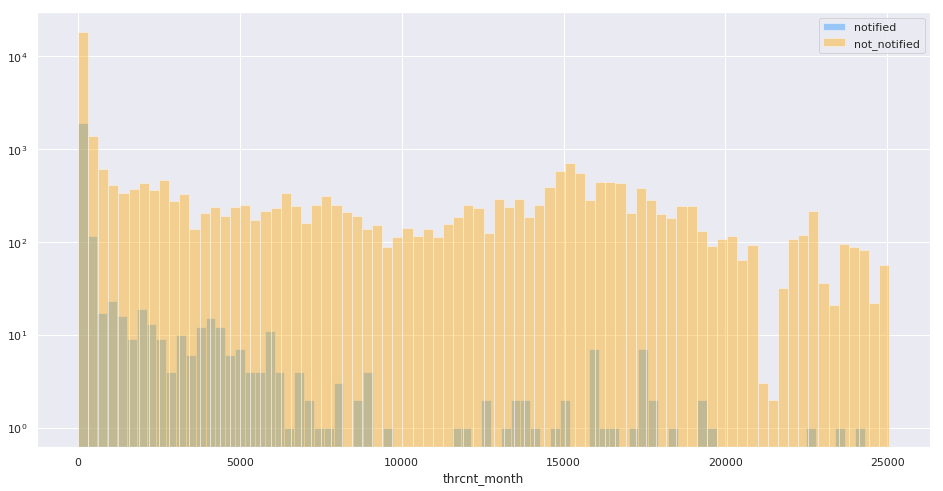

In [54]:
joint_variable_exploration(dataset=training, column='thrcnt_month', predicted_column='notified', bin_num=80, quantile=1, log_scale=True, no_notify=True, notify=True)

### thrcnt_week
- a number of records from an auxiliary table with threat watch alerts, denoted for the same IP address as the alert, during the previous week

Describe
count    39427.000000
mean      1483.977072
std       1838.284808
min          1.000000
25%         12.000000
50%         93.000000
75%       3531.000000
max       6286.000000
Name: thrcnt_week, dtype: float64


Basic Histogram


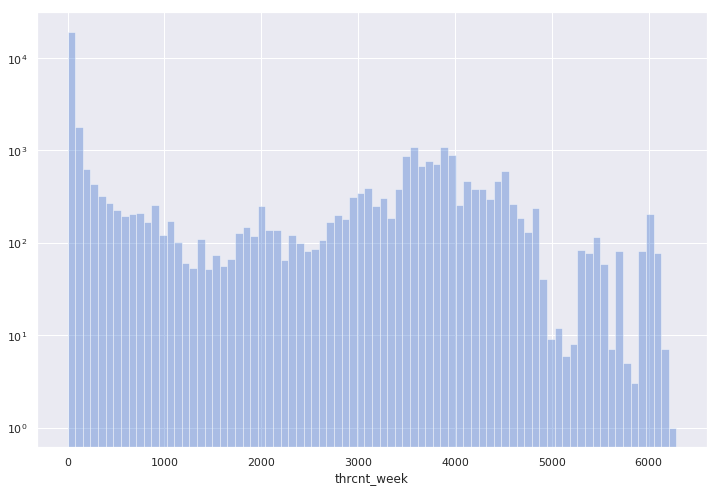

Histogram by  notified
not_notified count    37151.000000
mean      1562.262254
std       1858.458700
min          1.000000
25%         13.000000
50%        133.000000
75%       3579.000000
max       6286.000000
Name: thrcnt_week, dtype: float64


notified:  count    2276.000000
mean      206.133128
std       655.182412
min         1.000000
25%         4.000000
50%        19.000000
75%        60.000000
max      6126.000000
Name: thrcnt_week, dtype: float64




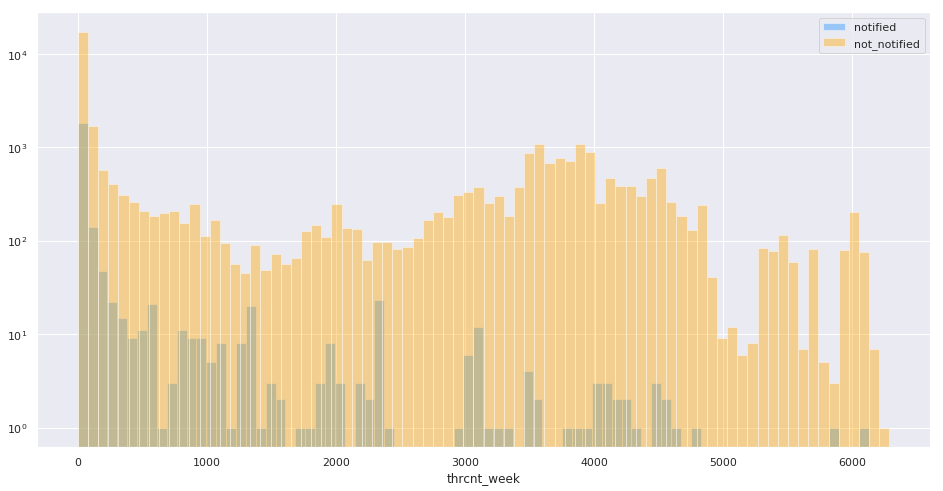

In [55]:
joint_variable_exploration(dataset=training, column='thrcnt_week', predicted_column='notified', bin_num=80, quantile=1, log_scale=True, no_notify=True, notify=True)

### thrcnt_day
- a number of records from an auxiliary table with threat watch alerts, denoted for the same IP address as the alert, during the previous day

Describe
count    39427.000000
mean       237.179902
std        301.414460
min          1.000000
25%          3.000000
50%         17.000000
75%        555.000000
max       1209.000000
Name: thrcnt_day, dtype: float64


Basic Histogram


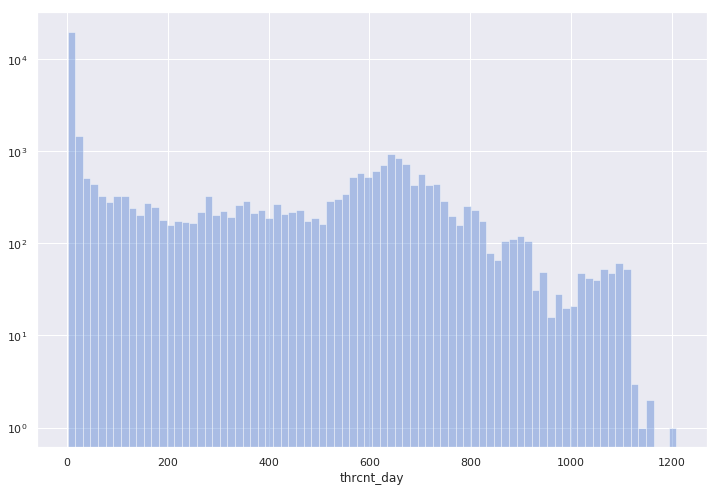

Histogram by  notified
not_notified count    37151.000000
mean       249.688488
std        305.106146
min          1.000000
25%          3.000000
50%         24.000000
75%        571.000000
max       1209.000000
Name: thrcnt_day, dtype: float64


notified:  count    2276.000000
mean       33.003076
std       100.327107
min         1.000000
25%         1.000000
50%         4.000000
75%        11.000000
max      1060.000000
Name: thrcnt_day, dtype: float64




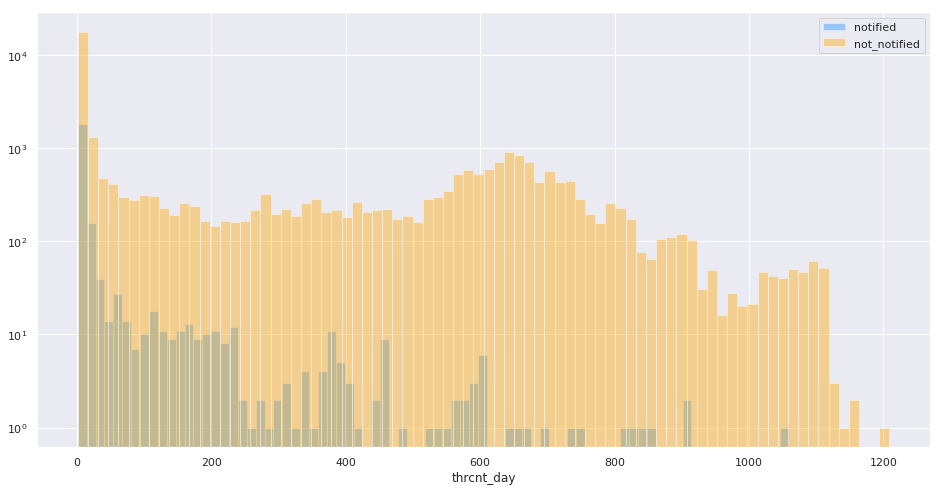

In [56]:
joint_variable_exploration(dataset=training, column='thrcnt_day', predicted_column='notified', bin_num=80, quantile=1, log_scale=True, no_notify=True, notify=True)

### p6, p5m, p5w, p5d, p8m, p8w, p8d

- a result of an analytical query pX for the corresponding alert, on an auxiliary table with threat watch alerts


Column:  p6


Describe
count    39427.000000
mean         0.637000
std          0.752357
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         10.000000
Name: p6, dtype: float64


Value counts
0     19247
1     16443
2      2867
3       639
4       162
5        49
6        15
7         4
10        1
Name: p6, dtype: int64


Value caunts by  notified
notified         0         1
p6                          
0         0.931418  0.068582
1         0.965639  0.034361
2         0.915940  0.084060
3         0.848200  0.151800
4         0.814815  0.185185
5         0.693878  0.306122
6         0.533333  0.466667
7         0.750000  0.250000
10        1.000000       NaN




<Figure size 864x576 with 0 Axes>

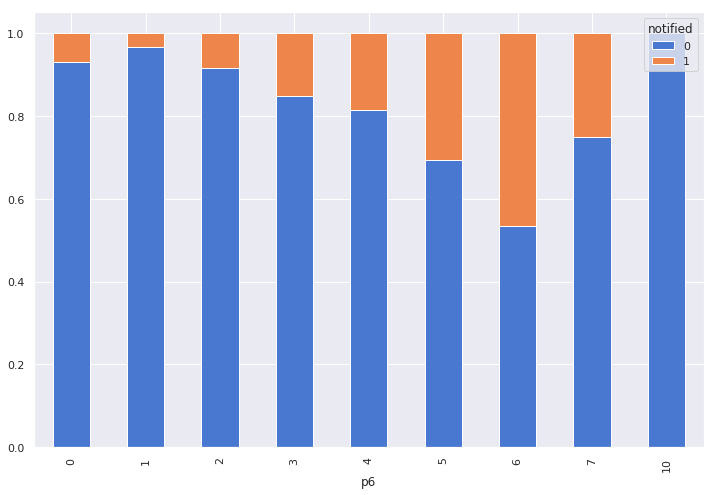

Column:  p5m


Describe
count    39427.000000
mean         1.687676
std          0.821452
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: p5m, dtype: float64


Value counts
1    20559
2    11445
3     6602
4      820
5        1
Name: p5m, dtype: int64


Value caunts by  notified
notified         0         1
p5m                         
1         0.952721  0.047279
2         0.944080  0.055920
3         0.914571  0.085429
4         0.878049  0.121951
5         1.000000       NaN




<Figure size 864x576 with 0 Axes>

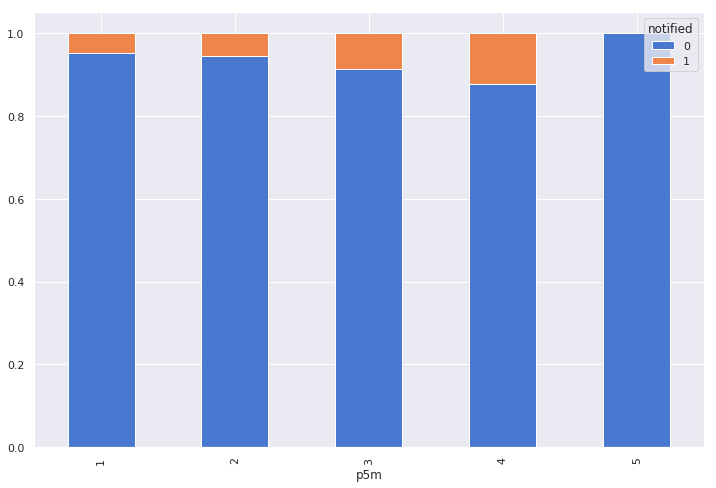

Column:  p5w


Describe
count    39427.000000
mean         1.461004
std          0.688861
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: p5w, dtype: float64


Value counts
1    25384
2    10233
3     3487
4      323
Name: p5w, dtype: int64


Value caunts by  notified
notified         0         1
p5w                         
1         0.951623  0.048377
2         0.938239  0.061761
3         0.894178  0.105822
4         0.854489  0.145511




<Figure size 864x576 with 0 Axes>

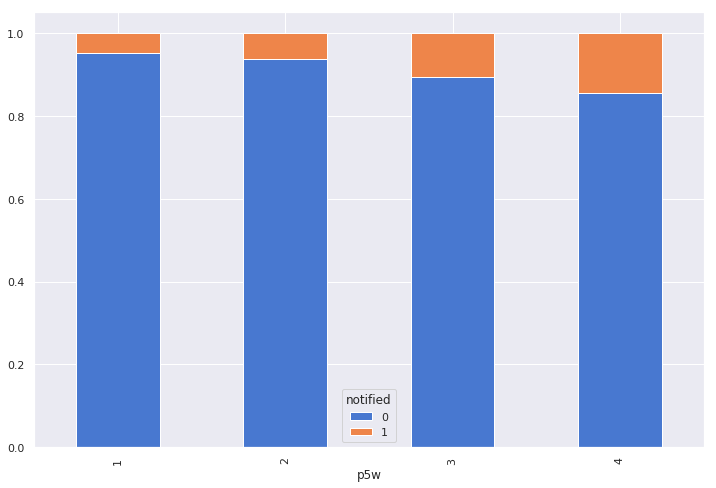

Column:  p5d


Describe
count    39427.000000
mean         1.210059
std          0.476887
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: p5d, dtype: float64


Value counts
1    32310
2     5999
3     1071
4       47
Name: p5d, dtype: int64


Value caunts by  notified
notified         0         1
p5d                         
1         0.948468  0.051532
2         0.919153  0.080847
3         0.892624  0.107376
4         0.765957  0.234043




<Figure size 864x576 with 0 Axes>

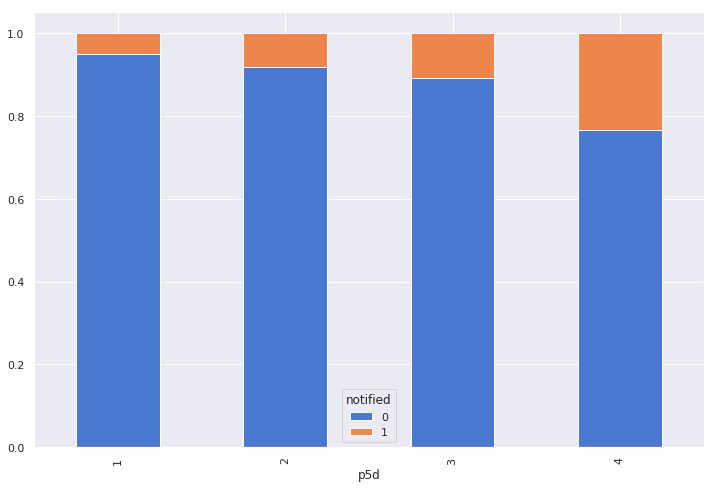

Column:  p8m


Describe
count    39427.000000
mean         1.489664
std          0.728059
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: p8m, dtype: float64


Value counts
1    25173
2     9671
3     4116
4      465
5        2
Name: p8m, dtype: int64


Value caunts by  notified
notified         0         1
p8m                         
1         0.957216  0.042784
2         0.935684  0.064316
3         0.880466  0.119534
4         0.819355  0.180645
5         0.500000  0.500000




<Figure size 864x576 with 0 Axes>

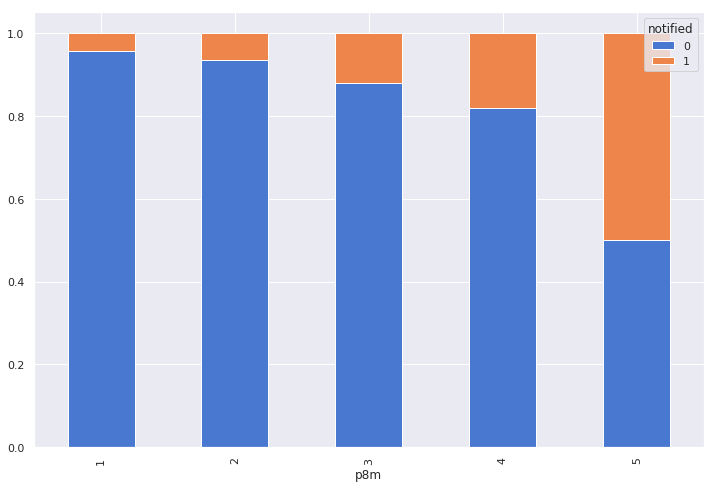

Column:  p8w


Describe
count    39427.000000
mean         1.347604
std          0.618028
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: p8w, dtype: float64


Value counts
1    28588
2     8165
3     2483
4      190
5        1
Name: p8w, dtype: int64


Value caunts by  notified
notified         0         1
p8w                         
1         0.954002  0.045998
2         0.925168  0.074832
3         0.875957  0.124043
4         0.784211  0.215789
5              NaN  1.000000




<Figure size 864x576 with 0 Axes>

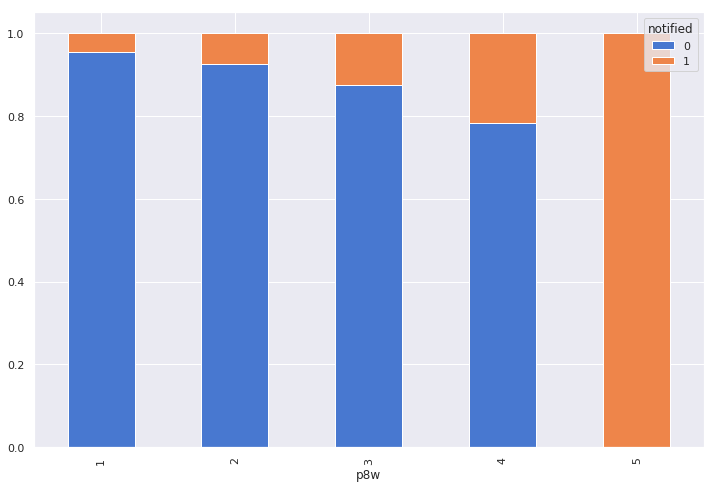

Column:  p8d


Describe
count    39427.000000
mean         1.165014
std          0.425987
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: p8d, dtype: float64


Value counts
1    33751
2     4877
3      768
4       31
Name: p8d, dtype: int64


Value caunts by  notified
notified         0         1
p8d                         
1         0.949305  0.050695
2         0.906295  0.093705
3         0.871094  0.128906
4         0.709677  0.290323




<Figure size 864x576 with 0 Axes>

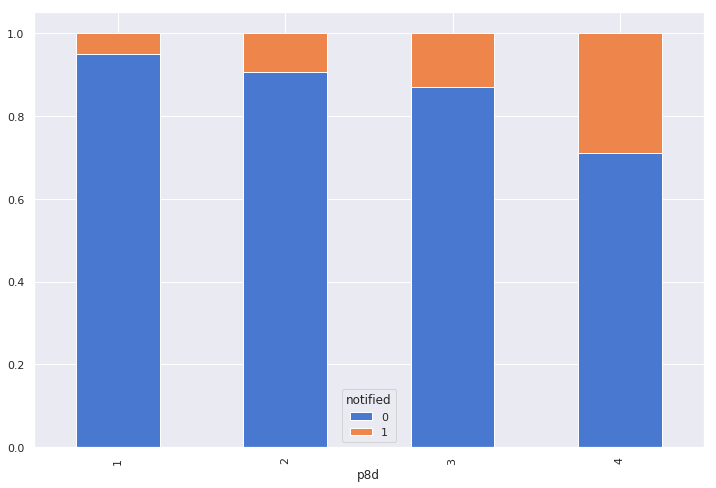

In [57]:
column_list = ["p6", "p5m", "p5w", "p5d", "p8m", "p8w", "p8d"]

for column in column_list:
    print("Column: ", column)
    print("\n")
    categorical_variable_exploration(dataset=training, column=column, predicted_column='notified', normalize=True, stacked=True)

### p9
- a result of an analytical query p9 for the corresponding alert, on an auxiliary table with threat watch alerts


Describe
count    39427.000000
mean         2.871966
std        125.514472
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      13290.000000
Name: p9, dtype: float64


Basic Histogram


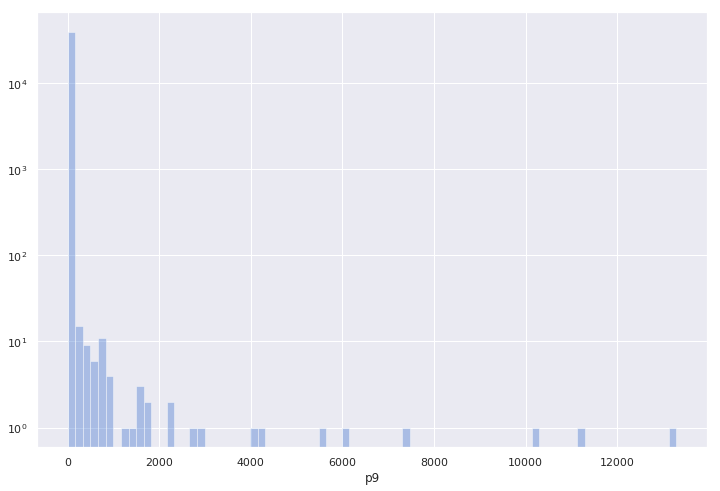

Histogram by  notified
not_notified count    37151.000000
mean         2.517994
std        120.888749
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      13290.000000
Name: p9, dtype: float64


notified:  count    2276.000000
mean        8.649824
std       185.304634
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      6062.000000
Name: p9, dtype: float64




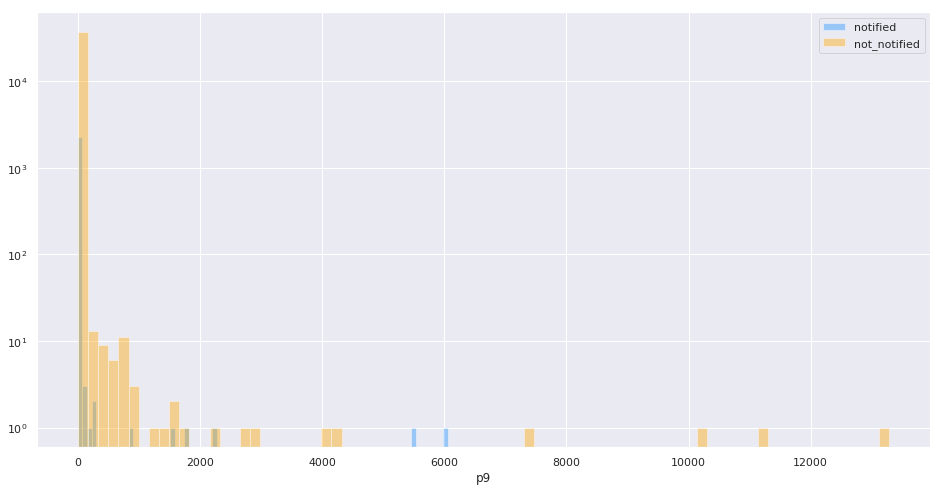

In [58]:
joint_variable_exploration(dataset=training, column='p9', predicted_column='notified', bin_num=80, quantile=1, log_scale=True, no_notify=True, notify=True)